In [1]:
# 분석 2

In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import pymysql

warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Gulim'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 100

In [3]:
all_df = pd.read_csv('all_city.csv')

In [4]:
주거용_전국 = all_df.groupby('연도').sum().주거용
업무용_전국 = all_df.groupby('연도').sum().업무용

주거용_전국 = pd.DataFrame(주거용_전국)
업무용_전국 = pd.DataFrame(업무용_전국)

In [5]:
변화량 = [ ]
try:
    for i in range(주거용_전국.shape[0]):
        변화량.append(round(((주거용_전국.iloc[i+1,0] - 주거용_전국.iloc[i,0]) / 주거용_전국.iloc[i,0] * 100),2))
except:
    pass

변화량2 = [ ]
try:
    for i in range(업무용_전국.shape[0]):
        변화량2.append(round(((업무용_전국.iloc[i+1,0] - 업무용_전국.iloc[i,0]) / 업무용_전국.iloc[i,0] * 100),2))
except:
    pass

주거용_변화량 = pd.DataFrame(변화량)
주거용_변화량.index=(['2015-2016','2016-2017','2017-2018','2018-2019','2019-2020','2020-2021','2021-2022'])
주거용_변화량.columns=(['변화량'])
업무용_변화량 = pd.DataFrame(변화량2)
업무용_변화량.index=(['2015-2016','2016-2017','2017-2018','2018-2019','2019-2020','2020-2021','2021-2022'])
업무용_변화량.columns=(['변화량'])

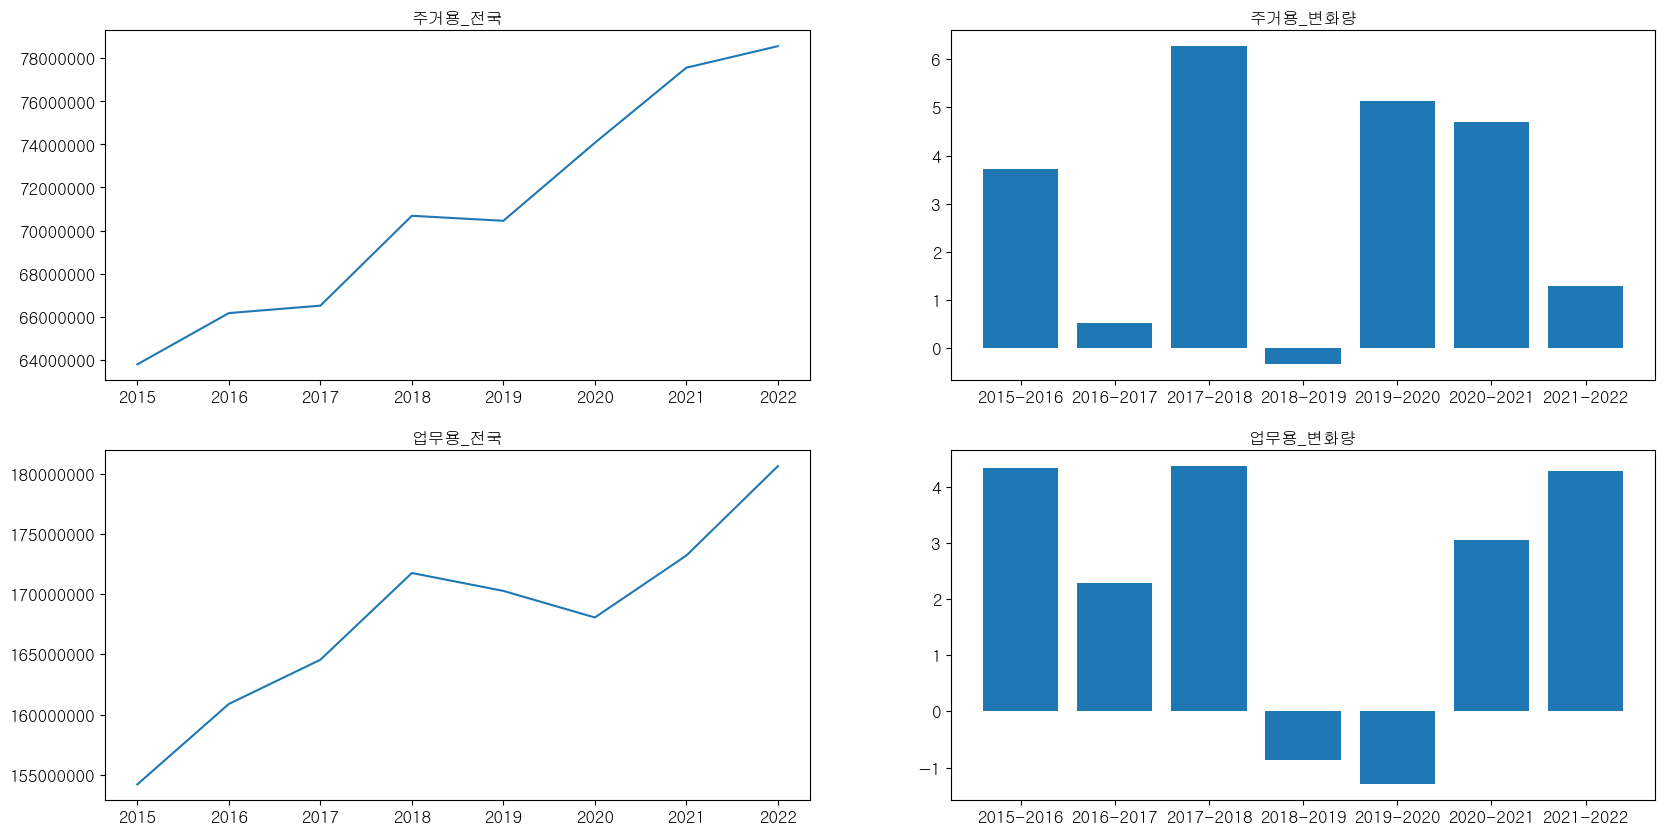

In [6]:
fig, ax = plt.subplots(2,2,figsize = (20,10))
ax[0,0].plot(주거용_전국.index,주거용_전국.주거용)
ax[0,0].set_title('주거용_전국',fontsize=12)
ax[0,0].get_yaxis().get_major_formatter().set_scientific(False)
ax[0,1].bar(주거용_변화량.index,주거용_변화량.변화량)
ax[0,1].set_title('주거용_변화량',fontsize=12)
ax[0,1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1,0].plot(업무용_전국.index,업무용_전국.업무용)
ax[1,0].set_title('업무용_전국',fontsize=12)
ax[1,0].get_yaxis().get_major_formatter().set_scientific(False)
ax[1,1].bar(업무용_변화량.index,업무용_변화량.변화량)
ax[1,1].set_title('업무용_변화량',fontsize=12)
ax[1,1].get_yaxis().get_major_formatter().set_scientific(False)

In [7]:
month = pd.read_csv('월별(2017~2022).csv',encoding='euc-kr')
month = month.T
month = month.drop(['2017','2017.4','2017.5','2017.6','2018','2018.4','2018.5','2018.6','2019','2019.4','2019.5','2019.6','2020','2020.4','2020.5','2020.6','2021','2021.4','2021.5','2021.6','2022','2022.4','2022.5','2022.6'])

In [8]:
월별_가정용 = month.loc[month[0] == '가정용',:]
월별_가정용.drop([1],axis=1,inplace=True)
월별_가정용.columns=(['분류','합계','1','2','3','4','5','6','7','8','9','10','11','12'])
월별_가정용 = 월별_가정용.iloc[:,2:]
월별_가정용.reset_index(inplace=True)

월별_업무용 = month.loc[(month[0] == '공공용') | (month[0] == '서비스업 및 기타')]
월별_업무용.drop([1],axis=1,inplace=True)
월별_업무용.index=(['2017','2017','2018','2018','2019','2019','2020','2020','2021','2021','2022','2022'])
tmp1 = 월별_업무용.iloc[:,0]
tmp2 = 월별_업무용.iloc[:,1:].astype(int)
월별_업무용 = pd.concat([tmp1,tmp2],axis=1)
월별_업무용 = 월별_업무용.groupby(월별_업무용.index).sum().iloc[:,2:]
월별_업무용.columns=(['1','2','3','4','5','6','7','8','9','10','11','12'])
월별_업무용.reset_index(inplace=True)

In [9]:
월별_가정용.to_csv('month_hm.csv',index=False)
월별_업무용.to_csv('month_ofc.csv',index=False)

In [10]:
월별_가정용 = pd.read_csv('month_hm.csv')
월별_업무용 = pd.read_csv('month_ofc.csv')
월별_가정용.set_index('index',inplace=True)
월별_가정용.index=(['2017','2018','2019','2020','2021','2022'])
월별_업무용.set_index('index',inplace=True)
월별_가정용 = 월별_가정용.T
월별_업무용 = 월별_업무용.T

Text(0.5, 1.0, '월별 업무용 전력 판매량')

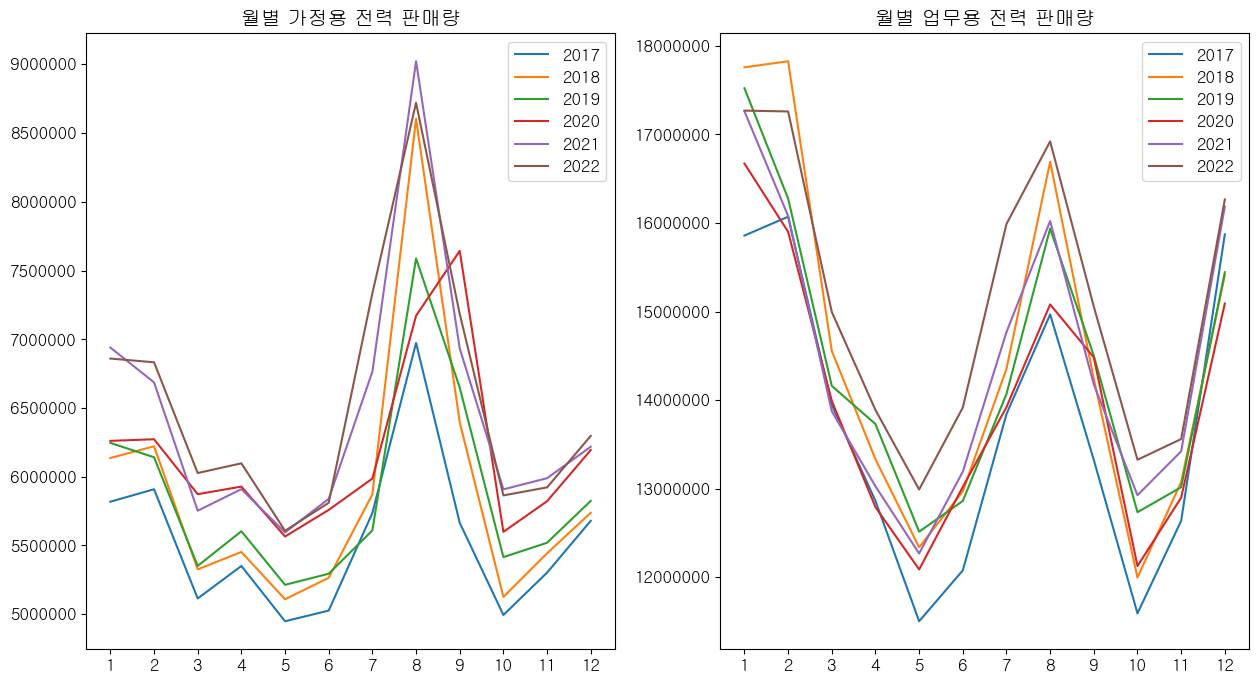

In [11]:
fig, ax = plt.subplots(1,2,figsize=(15,8))
label = 월별_가정용.columns
ax[0].plot(월별_가정용.index,월별_가정용,label=label)
ax[0].get_yaxis().get_major_formatter().set_scientific(False)
ax[0].legend()
ax[0].set_title('월별 가정용 전력 판매량')
ax[1].plot(월별_업무용.index,월별_업무용,label=label)
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].legend()
ax[1].set_title('월별 업무용 전력 판매량')

In [12]:
서울 = pd.read_csv('서울.csv')
인천 = pd.read_csv('인천.csv')
대전 = pd.read_csv('대전.csv')
대구 = pd.read_csv('대구.csv')
광주 = pd.read_csv('광주.csv')
부산 = pd.read_csv('부산.csv')
울산 = pd.read_csv('울산.csv')
제주 = pd.read_csv('제주.csv')
세종 = pd.read_csv('세종.csv')

In [13]:
서울합 = pd.DataFrame(서울.iloc[:,-3:].sum())
인천합 = pd.DataFrame(인천.iloc[:,-3:].sum())
대전합 = pd.DataFrame(대전.iloc[:,-3:].sum())
대구합 = pd.DataFrame(대구.iloc[:,-3:].sum())
광주합 = pd.DataFrame(광주.iloc[:,-3:].sum())
부산합 = pd.DataFrame(부산.iloc[:,-3:].sum())
울산합 = pd.DataFrame(울산.iloc[:,-3:].sum())
제주합 = pd.DataFrame(제주.iloc[:,-3:].sum())
세종합 = pd.DataFrame(세종.iloc[:,-3:].sum())

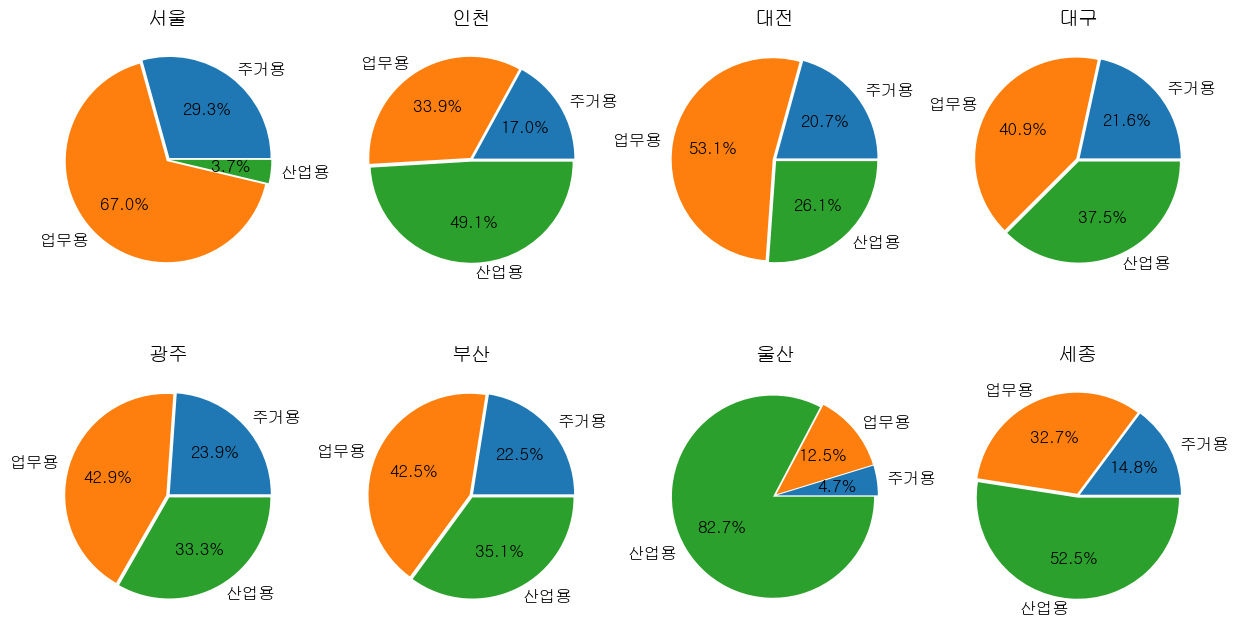

In [14]:
fig, ax = plt.subplots(2,4,figsize=(15,8))
explode = [0.02,0.02,0.02]
ax[0,0].pie(서울합[0],labels = 서울합.index,autopct='%.1f%%',explode=explode)
ax[0,0].set_title('서울')
ax[0,1].pie(인천합[0],labels = 인천합.index,autopct='%.1f%%',explode=explode)
ax[0,1].set_title('인천')
ax[0,2].pie(대전합[0],labels = 대전합.index,autopct='%.1f%%',explode=explode)
ax[0,2].set_title('대전')
ax[0,3].pie(대구합[0],labels = 대구합.index,autopct='%.1f%%',explode=explode)
ax[0,3].set_title('대구')
ax[1,0].pie(광주합[0],labels = 광주합.index,autopct='%.1f%%',explode=explode)
ax[1,0].set_title('광주')
ax[1,1].pie(부산합[0],labels = 부산합.index,autopct='%.1f%%',explode=explode)
ax[1,1].set_title('부산')
ax[1,2].pie(울산합[0],labels = 울산합.index,autopct='%.1f%%',explode=explode)
ax[1,2].set_title('울산')
ax[1,3].pie(세종합[0],labels = 세종합.index,autopct='%.1f%%',explode=explode)
ax[1,3].set_title('세종')
fig.show()

In [15]:
# https://namu.wiki/w/%EC%82%AC%ED%9A%8C%EC%A0%81%20%EA%B1%B0%EB%A6%AC%EB%91%90%EA%B8%B0/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD
거리두기 = pd.read_excel("사회적 거리두기 시행내역(임시).xlsx")

In [16]:
거리두기 = 거리두기.iloc[:21,:].set_index('날짜')

In [17]:
거리두기.index = (['2020-02','03','04','05','06','07','08','09','10','11','12','2021-01','02','03','04','05','06','07','08','09','10'])

In [18]:
거리두기.to_csv('거리두기.csv',index=False)

In [19]:
거리두기

,서울,인천,대전,대구,광주,부산,울산,제주,세종
2020-02,3,3,3,3,3,3,3,3,3
03,3,3,3,3,3,3,3,3,3
04,3,3,3,3,3,3,3,3,3
05,1,1,1,1,1,1,1,1,1
06,1,1,1,1,1,1,1,1,1
07,1,1,1,1,1,1,1,1,1
08,2,2,2,2,2,2,2,2,2
09,2.5,2.5,2,2,2,2,2,2,2
10,2,2,2,2,2,2,2,2,2
11,2,2,1,1,1.5,1,1,1,1


In [20]:
# https://home.kepco.co.kr/kepco/KO/ntcob/list.do?boardCd=BRD_000097&menuCd=FN05030101
판매2002 = pd.read_excel('2002.xlsx')
판매2003 = pd.read_excel('2003.xlsx')
판매2004 = pd.read_excel('2004.xlsx')
판매2005 = pd.read_excel('2005.xlsx')
판매2006 = pd.read_excel('2006.xlsx')
판매2007 = pd.read_excel('2007.xlsx')
판매2008 = pd.read_excel('2008.xlsx')
판매2009 = pd.read_excel('2009.xlsx')
판매2010 = pd.read_excel('2010.xlsx')
판매2011 = pd.read_excel('2011.xlsx')
판매2012 = pd.read_excel('2012.xlsx')

판매2101 = pd.read_excel('2101.xlsx')
판매2102 = pd.read_excel('2102.xlsx')
판매2103 = pd.read_excel('2103.xlsx')
판매2104 = pd.read_excel('2104.xlsx')
판매2105 = pd.read_excel('2105.xlsx')
판매2106 = pd.read_excel('2106.xlsx')
판매2107 = pd.read_excel('2107.xlsx')
판매2108 = pd.read_excel('2108.xlsx')
판매2109 = pd.read_excel('2109.xlsx')
판매2110 = pd.read_excel('2110.xlsx')
판매2111 = pd.read_excel('2111.xlsx')
판매2112 = pd.read_excel('2112.xlsx')

판매2201 = pd.read_excel('2201.xlsx')
판매2202 = pd.read_excel('2202.xlsx')
판매2203 = pd.read_excel('2203.xlsx')
판매2204 = pd.read_excel('2204.xlsx')
판매2205 = pd.read_excel('2205.xlsx')
판매2206 = pd.read_excel('2206.xlsx')
판매2207 = pd.read_excel('2207.xlsx')
판매2208 = pd.read_excel('2208.xlsx')
판매2209 = pd.read_excel('2209.xlsx')
판매2210 = pd.read_excel('2210.xlsx')
판매2211 = pd.read_excel('2211.xlsx')
판매2212 = pd.read_excel('2212.xlsx')

In [21]:
판매2002 = 판매2002.loc[(판매2002.index == 0) | (판매2002.index == 7) | (판매2002.index == 40)]
tmp1 = 판매2002.iloc[:,3:10]
tmp2 = 판매2002.iloc[:,-4:-2]
판매2002 = pd.concat([tmp1,tmp2],axis=1)
판매2002.index = (['가정용','업무용','산업용'])

판매2003 = 판매2003.loc[(판매2003.index == 0) | (판매2003.index == 7) | (판매2003.index == 40)]
tmp1 = 판매2003.iloc[:,3:10]
tmp2 = 판매2003.iloc[:,-4:-2]
판매2003 = pd.concat([tmp1,tmp2],axis=1)
판매2003.index = (['가정용','업무용','산업용'])

판매2004 = 판매2004.loc[(판매2004.index == 0) | (판매2004.index == 7) | (판매2004.index == 40)]
tmp1 = 판매2004.iloc[:,3:10]
tmp2 = 판매2004.iloc[:,-4:-2]
판매2004 = pd.concat([tmp1,tmp2],axis=1)
판매2004.index = (['가정용','업무용','산업용'])

판매2005 = 판매2005.loc[(판매2005.index == 0) | (판매2005.index == 7) | (판매2005.index == 40)]
tmp1 = 판매2005.iloc[:,3:10]
tmp2 = 판매2005.iloc[:,-4:-2]
판매2005 = pd.concat([tmp1,tmp2],axis=1)
판매2005.index = (['가정용','업무용','산업용'])

판매2006 = 판매2006.loc[(판매2006.index == 0) | (판매2006.index == 7) | (판매2006.index == 40)]
tmp1 = 판매2006.iloc[:,3:10]
tmp2 = 판매2006.iloc[:,-4:-2]
판매2006 = pd.concat([tmp1,tmp2],axis=1)
판매2006.index = (['가정용','업무용','산업용'])

판매2007 = 판매2007.loc[(판매2007.index == 0) | (판매2007.index == 7) | (판매2007.index == 40)]
tmp1 = 판매2007.iloc[:,3:10]
tmp2 = 판매2007.iloc[:,-4:-2]
판매2007 = pd.concat([tmp1,tmp2],axis=1)
판매2007.index = (['가정용','업무용','산업용'])

판매2008 = 판매2008.loc[(판매2008.index == 0) | (판매2008.index == 7) | (판매2008.index == 40)]
tmp1 = 판매2008.iloc[:,3:10]
tmp2 = 판매2008.iloc[:,-4:-2]
판매2008 = pd.concat([tmp1,tmp2],axis=1)
판매2008.index = (['가정용','업무용','산업용'])

판매2009 = 판매2009.loc[(판매2009.index == 0) | (판매2009.index == 7) | (판매2009.index == 40)]
tmp1 = 판매2009.iloc[:,3:10]
tmp2 = 판매2009.iloc[:,-4:-2]
판매2009 = pd.concat([tmp1,tmp2],axis=1)
판매2009.index = (['가정용','업무용','산업용'])

판매2010 = 판매2010.loc[(판매2010.index == 0) | (판매2010.index == 7) | (판매2010.index == 40)]
tmp1 = 판매2010.iloc[:,3:10]
tmp2 = 판매2010.iloc[:,-4:-2]
판매2010 = pd.concat([tmp1,tmp2],axis=1)
판매2010.index = (['가정용','업무용','산업용'])

판매2011 = 판매2011.loc[(판매2011.index == 0) | (판매2011.index == 7) | (판매2011.index == 40)]
tmp1 = 판매2011.iloc[:,3:10]
tmp2 = 판매2011.iloc[:,-4:-2]
판매2011 = pd.concat([tmp1,tmp2],axis=1)
판매2011.index = (['가정용','업무용','산업용'])

판매2012 = 판매2012.loc[(판매2012.index == 0) | (판매2012.index == 7) | (판매2012.index == 40)]
tmp1 = 판매2012.iloc[:,3:10]
tmp2 = 판매2012.iloc[:,-4:-2]
판매2012 = pd.concat([tmp1,tmp2],axis=1)
판매2012.index = (['가정용','업무용','산업용'])


In [22]:
판매2101 = 판매2101.loc[(판매2101.index == 0) | (판매2101.index == 7) | (판매2101.index == 40)]
tmp1 = 판매2101.iloc[:,3:10]
tmp2 = 판매2101.iloc[:,-4:-2]
판매2101 = pd.concat([tmp1,tmp2],axis=1)
판매2101.index = (['가정용','업무용','산업용'])

판매2102 = 판매2102.loc[(판매2102.index == 0) | (판매2102.index == 7) | (판매2102.index == 40)]
tmp1 = 판매2102.iloc[:,3:10]
tmp2 = 판매2102.iloc[:,-4:-2]
판매2102 = pd.concat([tmp1,tmp2],axis=1)
판매2102.index = (['가정용','업무용','산업용'])

판매2103 = 판매2103.loc[(판매2103.index == 0) | (판매2103.index == 7) | (판매2103.index == 40)]
tmp1 = 판매2103.iloc[:,3:10]
tmp2 = 판매2103.iloc[:,-4:-2]
판매2103 = pd.concat([tmp1,tmp2],axis=1)
판매2103.index = (['가정용','업무용','산업용'])

tmp1 = pd.DataFrame(판매2104.iloc[0].drop([판매2104.columns[0],판매2104.columns[1]])).T
tmp2 = pd.DataFrame(판매2104.iloc[1:3].drop([판매2104.columns[0],판매2104.columns[1]],axis=1).sum()).T
tmp3 = pd.DataFrame(판매2104.iloc[3:6].drop([판매2104.columns[0],판매2104.columns[1]],axis=1).sum()).T
판매2104 = pd.concat([tmp1,tmp2,tmp3])
tmp4 = 판매2104.iloc[:,0:7]
tmp5 = 판매2104.iloc[:,-4:-2]
판매2104 = pd.concat([tmp4,tmp5],axis=1)
판매2104.index = (['가정용','업무용','산업용'])

tmp1 = pd.DataFrame(판매2105.iloc[0].drop([판매2105.columns[0],판매2105.columns[1]])).T
tmp2 = pd.DataFrame(판매2105.iloc[1:3].drop([판매2105.columns[0],판매2105.columns[1]],axis=1).sum()).T
tmp3 = pd.DataFrame(판매2105.iloc[3:6].drop([판매2105.columns[0],판매2105.columns[1]],axis=1).sum()).T
판매2105 = pd.concat([tmp1,tmp2,tmp3])
tmp4 = 판매2105.iloc[:,0:7]
tmp5 = 판매2105.iloc[:,-4:-2]
판매2105 = pd.concat([tmp4,tmp5],axis=1)
판매2105.index = (['가정용','업무용','산업용'])

tmp1 = pd.DataFrame(판매2106.iloc[0].drop([판매2106.columns[0],판매2106.columns[1]])).T
tmp2 = pd.DataFrame(판매2106.iloc[1:3].drop([판매2106.columns[0],판매2106.columns[1]],axis=1).sum()).T
tmp3 = pd.DataFrame(판매2106.iloc[3:6].drop([판매2106.columns[0],판매2106.columns[1]],axis=1).sum()).T
판매2106 = pd.concat([tmp1,tmp2,tmp3])
tmp4 = 판매2106.iloc[:,0:7]
tmp5 = 판매2106.iloc[:,-4:-2]
판매2106 = pd.concat([tmp4,tmp5],axis=1)
판매2106.index = (['가정용','업무용','산업용'])

tmp1 = pd.DataFrame(판매2107.iloc[0].drop([판매2107.columns[0],판매2107.columns[1]])).T
tmp2 = pd.DataFrame(판매2107.iloc[1:3].drop([판매2107.columns[0],판매2107.columns[1]],axis=1).sum()).T
tmp3 = pd.DataFrame(판매2107.iloc[3:6].drop([판매2107.columns[0],판매2107.columns[1]],axis=1).sum()).T
판매2107 = pd.concat([tmp1,tmp2,tmp3])
tmp4 = 판매2107.iloc[:,0:7]
tmp5 = 판매2107.iloc[:,-4:-2]
판매2107 = pd.concat([tmp4,tmp5],axis=1)
판매2107.index = (['가정용','업무용','산업용'])

tmp1 = pd.DataFrame(판매2108.iloc[0].drop([판매2108.columns[0],판매2108.columns[1]])).T
tmp2 = pd.DataFrame(판매2108.iloc[1:3].drop([판매2108.columns[0],판매2108.columns[1]],axis=1).sum()).T
tmp3 = pd.DataFrame(판매2108.iloc[3:6].drop([판매2108.columns[0],판매2108.columns[1]],axis=1).sum()).T
판매2108 = pd.concat([tmp1,tmp2,tmp3])
tmp4 = 판매2108.iloc[:,0:7]
tmp5 = 판매2108.iloc[:,-4:-2]
판매2108 = pd.concat([tmp4,tmp5],axis=1)
판매2108.index = (['가정용','업무용','산업용'])

tmp1 = pd.DataFrame(판매2109.iloc[0].drop([판매2109.columns[0],판매2109.columns[1]])).T
tmp2 = pd.DataFrame(판매2109.iloc[1:3].drop([판매2109.columns[0],판매2109.columns[1]],axis=1).sum()).T
tmp3 = pd.DataFrame(판매2109.iloc[3:6].drop([판매2109.columns[0],판매2109.columns[1]],axis=1).sum()).T
판매2109 = pd.concat([tmp1,tmp2,tmp3])
tmp4 = 판매2109.iloc[:,0:7]
tmp5 = 판매2109.iloc[:,-4:-2]
판매2109 = pd.concat([tmp4,tmp5],axis=1)
판매2109.index = (['가정용','업무용','산업용'])

tmp1 = pd.DataFrame(판매2110.iloc[0].drop([판매2110.columns[0],판매2110.columns[1]])).T
tmp2 = pd.DataFrame(판매2110.iloc[1:3].drop([판매2110.columns[0],판매2110.columns[1]],axis=1).sum()).T
tmp3 = pd.DataFrame(판매2110.iloc[3:6].drop([판매2110.columns[0],판매2110.columns[1]],axis=1).sum()).T
판매2110 = pd.concat([tmp1,tmp2,tmp3])
tmp4 = 판매2110.iloc[:,0:7]
tmp5 = 판매2110.iloc[:,-4:-2]
판매2110 = pd.concat([tmp4,tmp5],axis=1)
판매2110.index = (['가정용','업무용','산업용'])

tmp1 = pd.DataFrame(판매2111.iloc[0].drop([판매2111.columns[0],판매2111.columns[1]])).T
tmp2 = pd.DataFrame(판매2111.iloc[1:3].drop([판매2111.columns[0],판매2111.columns[1]],axis=1).sum()).T
tmp3 = pd.DataFrame(판매2111.iloc[3:6].drop([판매2111.columns[0],판매2111.columns[1]],axis=1).sum()).T
판매2111 = pd.concat([tmp1,tmp2,tmp3])
tmp4 = 판매2111.iloc[:,0:7]
tmp5 = 판매2111.iloc[:,-4:-2]
판매2111 = pd.concat([tmp4,tmp5],axis=1)
판매2111.index = (['가정용','업무용','산업용'])

tmp1 = pd.DataFrame(판매2112.iloc[0].drop([판매2112.columns[0],판매2112.columns[1]])).T
tmp2 = pd.DataFrame(판매2112.iloc[1:3].drop([판매2112.columns[0],판매2112.columns[1]],axis=1).sum()).T
tmp3 = pd.DataFrame(판매2112.iloc[3:6].drop([판매2112.columns[0],판매2112.columns[1]],axis=1).sum()).T
판매2112 = pd.concat([tmp1,tmp2,tmp3])
tmp4 = 판매2112.iloc[:,0:7]
tmp5 = 판매2112.iloc[:,-4:-2]
판매2112 = pd.concat([tmp4,tmp5],axis=1)
판매2112.index = (['가정용','업무용','산업용'])

In [23]:
tmp1 = pd.DataFrame(판매2201.iloc[0].drop([판매2201.columns[0],판매2201.columns[1]])).T
tmp2 = pd.DataFrame(판매2201.iloc[1:3].drop([판매2201.columns[0],판매2201.columns[1]],axis=1).sum()).T
tmp3 = pd.DataFrame(판매2201.iloc[3:6].drop([판매2201.columns[0],판매2201.columns[1]],axis=1).sum()).T
판매2201 = pd.concat([tmp1,tmp2,tmp3])
tmp4 = 판매2201.iloc[:,0:8]
tmp5 = 판매2201.iloc[:,16]
판매2201 = pd.concat([tmp4,tmp5],axis=1)
판매2201.index = (['가정용','업무용','산업용'])

tmp1 = pd.DataFrame(판매2202.iloc[0].drop([판매2202.columns[0],판매2202.columns[1]])).T
tmp2 = pd.DataFrame(판매2202.iloc[1:3].drop([판매2202.columns[0],판매2202.columns[1]],axis=1).sum()).T
tmp3 = pd.DataFrame(판매2202.iloc[3:6].drop([판매2202.columns[0],판매2202.columns[1]],axis=1).sum()).T
판매2202 = pd.concat([tmp1,tmp2,tmp3])
tmp4 = 판매2202.iloc[:,0:8]
tmp5 = 판매2202.iloc[:,16]
판매2202 = pd.concat([tmp4,tmp5],axis=1)
판매2202.index = (['가정용','업무용','산업용'])

tmp1 = pd.DataFrame(판매2203.iloc[0].drop([판매2203.columns[0],판매2203.columns[1]])).T
tmp2 = pd.DataFrame(판매2203.iloc[1:3].drop([판매2203.columns[0],판매2203.columns[1]],axis=1).sum()).T
tmp3 = pd.DataFrame(판매2203.iloc[3:6].drop([판매2203.columns[0],판매2203.columns[1]],axis=1).sum()).T
판매2203 = pd.concat([tmp1,tmp2,tmp3])
tmp4 = 판매2203.iloc[:,0:8]
tmp5 = 판매2203.iloc[:,16]
판매2203 = pd.concat([tmp4,tmp5],axis=1)
판매2203.index = (['가정용','업무용','산업용'])

tmp1 = pd.DataFrame(판매2204.iloc[0].drop([판매2204.columns[0],판매2204.columns[1]])).T
tmp2 = pd.DataFrame(판매2204.iloc[1:3].drop([판매2204.columns[0],판매2204.columns[1]],axis=1).sum()).T
tmp3 = pd.DataFrame(판매2204.iloc[3:6].drop([판매2204.columns[0],판매2204.columns[1]],axis=1).sum()).T
판매2204 = pd.concat([tmp1,tmp2,tmp3])
tmp4 = 판매2204.iloc[:,0:8]
tmp5 = 판매2204.iloc[:,16]
판매2204 = pd.concat([tmp4,tmp5],axis=1)
판매2204.index = (['가정용','업무용','산업용'])

tmp1 = pd.DataFrame(판매2205.iloc[0].drop([판매2205.columns[0],판매2205.columns[1]])).T
tmp2 = pd.DataFrame(판매2205.iloc[1:3].drop([판매2205.columns[0],판매2205.columns[1]],axis=1).sum()).T
tmp3 = pd.DataFrame(판매2205.iloc[3:6].drop([판매2205.columns[0],판매2205.columns[1]],axis=1).sum()).T
판매2205 = pd.concat([tmp1,tmp2,tmp3])
tmp4 = 판매2205.iloc[:,0:8]
tmp5 = 판매2205.iloc[:,16]
판매2205 = pd.concat([tmp4,tmp5],axis=1)
판매2205.index = (['가정용','업무용','산업용'])

tmp1 = pd.DataFrame(판매2206.iloc[0].drop([판매2206.columns[0],판매2206.columns[1]])).T
tmp2 = pd.DataFrame(판매2206.iloc[1:3].drop([판매2206.columns[0],판매2206.columns[1]],axis=1).sum()).T
tmp3 = pd.DataFrame(판매2206.iloc[3:6].drop([판매2206.columns[0],판매2206.columns[1]],axis=1).sum()).T
판매2206 = pd.concat([tmp1,tmp2,tmp3])
tmp4 = 판매2206.iloc[:,0:8]
tmp5 = 판매2206.iloc[:,16]
판매2206 = pd.concat([tmp4,tmp5],axis=1)
판매2206.index = (['가정용','업무용','산업용'])

tmp1 = pd.DataFrame(판매2207.iloc[0].drop([판매2207.columns[0],판매2207.columns[1]])).T
tmp2 = pd.DataFrame(판매2207.iloc[1:3].drop([판매2207.columns[0],판매2207.columns[1]],axis=1).sum()).T
tmp3 = pd.DataFrame(판매2207.iloc[3:6].drop([판매2207.columns[0],판매2207.columns[1]],axis=1).sum()).T
판매2207 = pd.concat([tmp1,tmp2,tmp3])
tmp4 = 판매2207.iloc[:,0:8]
tmp5 = 판매2207.iloc[:,16]
판매2207 = pd.concat([tmp4,tmp5],axis=1)
판매2207.index = (['가정용','업무용','산업용'])

tmp1 = pd.DataFrame(판매2208.iloc[0].drop([판매2208.columns[0],판매2208.columns[1]])).T
tmp2 = pd.DataFrame(판매2208.iloc[1:3].drop([판매2208.columns[0],판매2208.columns[1]],axis=1).sum()).T
tmp3 = pd.DataFrame(판매2208.iloc[3:6].drop([판매2208.columns[0],판매2208.columns[1]],axis=1).sum()).T
판매2208 = pd.concat([tmp1,tmp2,tmp3])
tmp4 = 판매2208.iloc[:,0:8]
tmp5 = 판매2208.iloc[:,16]
판매2208 = pd.concat([tmp4,tmp5],axis=1)
판매2208.index = (['가정용','업무용','산업용'])

tmp1 = pd.DataFrame(판매2209.iloc[0].drop([판매2209.columns[0],판매2209.columns[1]])).T
tmp2 = pd.DataFrame(판매2209.iloc[1:3].drop([판매2209.columns[0],판매2209.columns[1]],axis=1).sum()).T
tmp3 = pd.DataFrame(판매2209.iloc[3:6].drop([판매2209.columns[0],판매2209.columns[1]],axis=1).sum()).T
판매2209 = pd.concat([tmp1,tmp2,tmp3])
tmp4 = 판매2209.iloc[:,0:8]
tmp5 = 판매2209.iloc[:,16]
판매2209 = pd.concat([tmp4,tmp5],axis=1)
판매2209.index = (['가정용','업무용','산업용'])

tmp1 = pd.DataFrame(판매2210.iloc[0].drop([판매2210.columns[0],판매2210.columns[1]])).T
tmp2 = pd.DataFrame(판매2210.iloc[1:3].drop([판매2210.columns[0],판매2210.columns[1]],axis=1).sum()).T
tmp3 = pd.DataFrame(판매2210.iloc[3:6].drop([판매2210.columns[0],판매2210.columns[1]],axis=1).sum()).T
판매2210 = pd.concat([tmp1,tmp2,tmp3])
tmp4 = 판매2210.iloc[:,0:8]
tmp5 = 판매2210.iloc[:,16]
판매2210 = pd.concat([tmp4,tmp5],axis=1)
판매2210.index = (['가정용','업무용','산업용'])

tmp1 = pd.DataFrame(판매2211.iloc[0].drop([판매2211.columns[0],판매2211.columns[1]])).T
tmp2 = pd.DataFrame(판매2211.iloc[1:3].drop([판매2211.columns[0],판매2211.columns[1]],axis=1).sum()).T
tmp3 = pd.DataFrame(판매2211.iloc[3:6].drop([판매2211.columns[0],판매2211.columns[1]],axis=1).sum()).T
판매2211 = pd.concat([tmp1,tmp2,tmp3])
tmp4 = 판매2211.iloc[:,0:8]
tmp5 = 판매2211.iloc[:,16]
판매2211 = pd.concat([tmp4,tmp5],axis=1)
판매2211.index = (['가정용','업무용','산업용'])

tmp1 = pd.DataFrame(판매2212.iloc[0].drop([판매2212.columns[0],판매2212.columns[1]])).T
tmp2 = pd.DataFrame(판매2212.iloc[1:3].drop([판매2212.columns[0],판매2212.columns[1]],axis=1).sum()).T
tmp3 = pd.DataFrame(판매2212.iloc[3:6].drop([판매2212.columns[0],판매2212.columns[1]],axis=1).sum()).T
판매2212 = pd.concat([tmp1,tmp2,tmp3])
tmp4 = 판매2212.iloc[:,0:8]
tmp5 = 판매2212.iloc[:,16]
판매2212 = pd.concat([tmp4,tmp5],axis=1)
판매2212.index = (['가정용','업무용','산업용'])

In [24]:
판매2101.columns = 판매2002.columns
판매2102.columns = 판매2002.columns
판매2201.columns = 판매2002.columns

In [25]:
판매월별 = pd.concat([판매2002,판매2003,판매2004,판매2005,판매2006,판매2007,판매2008,판매2009,판매2010,판매2011,판매2012,판매2101,판매2102,판매2103,판매2104,판매2105,판매2106,판매2107,판매2108,판매2109,판매2110,판매2111,판매2112,판매2201,판매2202,판매2203,판매2204,판매2205,판매2206,판매2207,판매2208,판매2209,판매2210,판매2211,판매2212])

In [26]:
월가정서울 = pd.DataFrame(판매월별.loc[판매월별.index == '가정용',판매월별.columns[0]])
월가정부산 = pd.DataFrame(판매월별.loc[판매월별.index == '가정용',판매월별.columns[1]])
월가정대구 = pd.DataFrame(판매월별.loc[판매월별.index == '가정용',판매월별.columns[2]])
월가정인천 = pd.DataFrame(판매월별.loc[판매월별.index == '가정용',판매월별.columns[3]])
월가정광주 = pd.DataFrame(판매월별.loc[판매월별.index == '가정용',판매월별.columns[4]])
월가정대전 = pd.DataFrame(판매월별.loc[판매월별.index == '가정용',판매월별.columns[5]])
월가정울산 = pd.DataFrame(판매월별.loc[판매월별.index == '가정용',판매월별.columns[6]])
월가정제주 = pd.DataFrame(판매월별.loc[판매월별.index == '가정용',판매월별.columns[7]])
월가정세종 = pd.DataFrame(판매월별.loc[판매월별.index == '가정용',판매월별.columns[8]])

In [27]:
월업무서울 = pd.DataFrame(판매월별.loc[판매월별.index == '업무용',판매월별.columns[0]])
월업무부산 = pd.DataFrame(판매월별.loc[판매월별.index == '업무용',판매월별.columns[1]])
월업무대구 = pd.DataFrame(판매월별.loc[판매월별.index == '업무용',판매월별.columns[2]])
월업무인천 = pd.DataFrame(판매월별.loc[판매월별.index == '업무용',판매월별.columns[3]])
월업무광주 = pd.DataFrame(판매월별.loc[판매월별.index == '업무용',판매월별.columns[4]])
월업무대전 = pd.DataFrame(판매월별.loc[판매월별.index == '업무용',판매월별.columns[5]])
월업무울산 = pd.DataFrame(판매월별.loc[판매월별.index == '업무용',판매월별.columns[6]])
월업무제주 = pd.DataFrame(판매월별.loc[판매월별.index == '업무용',판매월별.columns[7]])
월업무세종 = pd.DataFrame(판매월별.loc[판매월별.index == '업무용',판매월별.columns[8]])

In [28]:
월산업서울 = pd.DataFrame(판매월별.loc[판매월별.index == '산업용',판매월별.columns[0]])
월산업부산 = pd.DataFrame(판매월별.loc[판매월별.index == '산업용',판매월별.columns[1]])
월산업대구 = pd.DataFrame(판매월별.loc[판매월별.index == '산업용',판매월별.columns[2]])
월산업인천 = pd.DataFrame(판매월별.loc[판매월별.index == '산업용',판매월별.columns[3]])
월산업광주 = pd.DataFrame(판매월별.loc[판매월별.index == '산업용',판매월별.columns[4]])
월산업대전 = pd.DataFrame(판매월별.loc[판매월별.index == '산업용',판매월별.columns[5]])
월산업울산 = pd.DataFrame(판매월별.loc[판매월별.index == '산업용',판매월별.columns[6]])
월산업제주 = pd.DataFrame(판매월별.loc[판매월별.index == '산업용',판매월별.columns[7]])
월산업세종 = pd.DataFrame(판매월별.loc[판매월별.index == '산업용',판매월별.columns[8]])

In [29]:
월가정서울.index = (['2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07','2021-08','2021-09','2021-10','2021-11','2021-12','2022-01','2022-02','2022-03','2022-04','2022-05','2022-06','2022-07','2022-08','2022-09','2022-10','2022-11','2022-12'])
월가정부산.index = 월가정서울.index
월가정대구.index = 월가정서울.index
월가정인천.index = 월가정서울.index
월가정광주.index = 월가정서울.index
월가정대전.index = 월가정서울.index
월가정울산.index = 월가정서울.index
월가정제주.index = 월가정서울.index
월가정세종.index = 월가정서울.index

월업무서울.index = 월가정서울.index
월업무부산.index = 월가정서울.index
월업무대구.index = 월가정서울.index
월업무인천.index = 월가정서울.index
월업무광주.index = 월가정서울.index
월업무대전.index = 월가정서울.index
월업무울산.index = 월가정서울.index
월업무제주.index = 월가정서울.index
월업무세종.index = 월가정서울.index

월산업서울.index = 월가정서울.index
월산업부산.index = 월가정서울.index
월산업대구.index = 월가정서울.index
월산업인천.index = 월가정서울.index
월산업광주.index = 월가정서울.index
월산업대전.index = 월가정서울.index
월산업울산.index = 월가정서울.index
월산업제주.index = 월가정서울.index
월산업세종.index = 월가정서울.index

In [30]:
변화량 = [ ]
try:
    for i in range(월가정서울.iloc[:21].shape[0]):
        변화량.append(round(((월가정서울.iloc[:21].iloc[i+1,0] - 월가정서울.iloc[:21].iloc[i,0]) / 월가정서울.iloc[:21].iloc[i,0] * 100),2))
except:
    pass

변화량2 = [ ]
try:
    for i in range(월업무서울.iloc[:21].shape[0]):
        변화량2.append(round(((월업무서울.iloc[:21].iloc[i+1,0] - 월업무서울.iloc[:21].iloc[i,0]) / 월업무서울.iloc[:21].iloc[i,0] * 100),2))
except:
    pass

변화량3 = [ ]
try:
    for i in range(월산업서울.iloc[:21].shape[0]):
        변화량3.append(round(((월산업서울.iloc[:21].iloc[i+1,0] - 월산업서울.iloc[:21].iloc[i,0]) / 월산업서울.iloc[:21].iloc[i,0] * 100),2))
except:
    pass
서울가정변화량 = pd.DataFrame(변화량)
서울가정변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
서울가정변화량.columns=(['변화량'])
서울업무변화량 = pd.DataFrame(변화량2)
서울업무변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
서울업무변화량.columns=(['변화량'])
서울산업변화량 = pd.DataFrame(변화량3)
서울산업변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
서울산업변화량.columns=(['변화량'])
서울가정변화량.reset_index(inplace=True)
서울업무변화량
서울산업변화량.reset_index(inplace=True)

In [31]:
변화량 = [ ]
try:
    for i in range(월가정인천.iloc[:21].shape[0]):
        변화량.append(round(((월가정인천.iloc[:21].iloc[i+1,0] - 월가정인천.iloc[:21].iloc[i,0]) / 월가정인천.iloc[:21].iloc[i,0] * 100),2))
except:
    pass

변화량2 = [ ]
try:
    for i in range(월업무인천.iloc[:21].shape[0]):
        변화량2.append(round(((월업무인천.iloc[:21].iloc[i+1,0] - 월업무인천.iloc[:21].iloc[i,0]) / 월업무인천.iloc[:21].iloc[i,0] * 100),2))
except:
    pass

변화량3 = [ ]
try:
    for i in range(월산업인천.iloc[:21].shape[0]):
        변화량3.append(round(((월산업인천.iloc[:21].iloc[i+1,0] - 월산업인천.iloc[:21].iloc[i,0]) / 월산업인천.iloc[:21].iloc[i,0] * 100),2))
except:
    pass
인천가정변화량 = pd.DataFrame(변화량)
인천가정변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
인천가정변화량.columns=(['변화량'])
인천업무변화량 = pd.DataFrame(변화량2)
인천업무변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
인천업무변화량.columns=(['변화량'])
인천산업변화량 = pd.DataFrame(변화량3)
인천산업변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
인천산업변화량.columns=(['변화량'])
인천가정변화량.reset_index(inplace=True)
인천업무변화량
인천산업변화량.reset_index(inplace=True)

In [32]:
변화량 = [ ]
try:
    for i in range(월가정대전.iloc[:21].shape[0]):
        변화량.append(round(((월가정대전.iloc[:21].iloc[i+1,0] - 월가정대전.iloc[:21].iloc[i,0]) / 월가정대전.iloc[:21].iloc[i,0] * 100),2))
except:
    pass

변화량2 = [ ]
try:
    for i in range(월업무대전.iloc[:21].shape[0]):
        변화량2.append(round(((월업무대전.iloc[:21].iloc[i+1,0] - 월업무대전.iloc[:21].iloc[i,0]) / 월업무대전.iloc[:21].iloc[i,0] * 100),2))
except:
    pass

변화량3 = [ ]
try:
    for i in range(월산업대전.iloc[:21].shape[0]):
        변화량3.append(round(((월산업대전.iloc[:21].iloc[i+1,0] - 월산업대전.iloc[:21].iloc[i,0]) / 월산업대전.iloc[:21].iloc[i,0] * 100),2))
except:
    pass
대전가정변화량 = pd.DataFrame(변화량)
대전가정변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
대전가정변화량.columns=(['변화량'])
대전업무변화량 = pd.DataFrame(변화량2)
대전업무변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
대전업무변화량.columns=(['변화량'])
대전산업변화량 = pd.DataFrame(변화량3)
대전산업변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
대전산업변화량.columns=(['변화량'])
대전가정변화량.reset_index(inplace=True)
대전업무변화량
대전산업변화량.reset_index(inplace=True)

In [33]:
변화량 = [ ]
try:
    for i in range(월가정세종.iloc[:21].shape[0]):
        변화량.append(round(((월가정세종.iloc[:21].iloc[i+1,0] - 월가정세종.iloc[:21].iloc[i,0]) / 월가정세종.iloc[:21].iloc[i,0] * 100),2))
except:
    pass

변화량2 = [ ]
try:
    for i in range(월업무세종.iloc[:21].shape[0]):
        변화량2.append(round(((월업무세종.iloc[:21].iloc[i+1,0] - 월업무세종.iloc[:21].iloc[i,0]) / 월업무세종.iloc[:21].iloc[i,0] * 100),2))
except:
    pass

변화량3 = [ ]
try:
    for i in range(월산업세종.iloc[:21].shape[0]):
        변화량3.append(round(((월산업세종.iloc[:21].iloc[i+1,0] - 월산업세종.iloc[:21].iloc[i,0]) / 월산업세종.iloc[:21].iloc[i,0] * 100),2))
except:
    pass
세종가정변화량 = pd.DataFrame(변화량)
세종가정변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
세종가정변화량.columns=(['변화량'])
세종업무변화량 = pd.DataFrame(변화량2)
세종업무변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
세종업무변화량.columns=(['변화량'])
세종산업변화량 = pd.DataFrame(변화량3)
세종산업변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
세종산업변화량.columns=(['변화량'])
세종가정변화량.reset_index(inplace=True)
세종업무변화량
세종산업변화량.reset_index(inplace=True)

In [34]:
변화량 = [ ]
try:
    for i in range(월가정대구.iloc[:21].shape[0]):
        변화량.append(round(((월가정대구.iloc[:21].iloc[i+1,0] - 월가정대구.iloc[:21].iloc[i,0]) / 월가정대구.iloc[:21].iloc[i,0] * 100),2))
except:
    pass

변화량2 = [ ]
try:
    for i in range(월업무대구.iloc[:21].shape[0]):
        변화량2.append(round(((월업무대구.iloc[:21].iloc[i+1,0] - 월업무대구.iloc[:21].iloc[i,0]) / 월업무대구.iloc[:21].iloc[i,0] * 100),2))
except:
    pass

변화량3 = [ ]
try:
    for i in range(월산업대구.iloc[:21].shape[0]):
        변화량3.append(round(((월산업대구.iloc[:21].iloc[i+1,0] - 월산업대구.iloc[:21].iloc[i,0]) / 월산업대구.iloc[:21].iloc[i,0] * 100),2))
except:
    pass
대구가정변화량 = pd.DataFrame(변화량)
대구가정변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
대구가정변화량.columns=(['변화량'])
대구업무변화량 = pd.DataFrame(변화량2)
대구업무변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
대구업무변화량.columns=(['변화량'])
대구산업변화량 = pd.DataFrame(변화량3)
대구산업변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
대구산업변화량.columns=(['변화량'])
대구가정변화량.reset_index(inplace=True)
대구업무변화량
대구산업변화량.reset_index(inplace=True)

In [35]:
변화량 = [ ]
try:
    for i in range(월가정광주.iloc[:21].shape[0]):
        변화량.append(round(((월가정광주.iloc[:21].iloc[i+1,0] - 월가정광주.iloc[:21].iloc[i,0]) / 월가정광주.iloc[:21].iloc[i,0] * 100),2))
except:
    pass

변화량2 = [ ]
try:
    for i in range(월업무광주.iloc[:21].shape[0]):
        변화량2.append(round(((월업무광주.iloc[:21].iloc[i+1,0] - 월업무광주.iloc[:21].iloc[i,0]) / 월업무광주.iloc[:21].iloc[i,0] * 100),2))
except:
    pass

변화량3 = [ ]
try:
    for i in range(월산업광주.iloc[:21].shape[0]):
        변화량3.append(round(((월산업광주.iloc[:21].iloc[i+1,0] - 월산업광주.iloc[:21].iloc[i,0]) / 월산업광주.iloc[:21].iloc[i,0] * 100),2))
except:
    pass
광주가정변화량 = pd.DataFrame(변화량)
광주가정변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
광주가정변화량.columns=(['변화량'])
광주업무변화량 = pd.DataFrame(변화량2)
광주업무변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
광주업무변화량.columns=(['변화량'])
광주산업변화량 = pd.DataFrame(변화량3)
광주산업변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
광주산업변화량.columns=(['변화량'])
광주가정변화량.reset_index(inplace=True)
광주업무변화량
광주산업변화량.reset_index(inplace=True)

In [36]:
변화량 = [ ]
try:
    for i in range(월가정부산.iloc[:21].shape[0]):
        변화량.append(round(((월가정부산.iloc[:21].iloc[i+1,0] - 월가정부산.iloc[:21].iloc[i,0]) / 월가정부산.iloc[:21].iloc[i,0] * 100),2))
except:
    pass

변화량2 = [ ]
try:
    for i in range(월업무부산.iloc[:21].shape[0]):
        변화량2.append(round(((월업무부산.iloc[:21].iloc[i+1,0] - 월업무부산.iloc[:21].iloc[i,0]) / 월업무부산.iloc[:21].iloc[i,0] * 100),2))
except:
    pass

변화량3 = [ ]
try:
    for i in range(월산업부산.iloc[:21].shape[0]):
        변화량3.append(round(((월산업부산.iloc[:21].iloc[i+1,0] - 월산업부산.iloc[:21].iloc[i,0]) / 월산업부산.iloc[:21].iloc[i,0] * 100),2))
except:
    pass
부산가정변화량 = pd.DataFrame(변화량)
부산가정변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
부산가정변화량.columns=(['변화량'])
부산업무변화량 = pd.DataFrame(변화량2)
부산업무변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
부산업무변화량.columns=(['변화량'])
부산산업변화량 = pd.DataFrame(변화량3)
부산산업변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
부산산업변화량.columns=(['변화량'])
부산가정변화량.reset_index(inplace=True)
부산업무변화량
부산산업변화량.reset_index(inplace=True)

In [37]:
변화량 = [ ]
try:
    for i in range(월가정울산.iloc[:21].shape[0]):
        변화량.append(round(((월가정울산.iloc[:21].iloc[i+1,0] - 월가정울산.iloc[:21].iloc[i,0]) / 월가정울산.iloc[:21].iloc[i,0] * 100),2))
except:
    pass

변화량2 = [ ]
try:
    for i in range(월업무울산.iloc[:21].shape[0]):
        변화량2.append(round(((월업무울산.iloc[:21].iloc[i+1,0] - 월업무울산.iloc[:21].iloc[i,0]) / 월업무울산.iloc[:21].iloc[i,0] * 100),2))
except:
    pass

변화량3 = [ ]
try:
    for i in range(월산업울산.iloc[:21].shape[0]):
        변화량3.append(round(((월산업울산.iloc[:21].iloc[i+1,0] - 월산업울산.iloc[:21].iloc[i,0]) / 월산업울산.iloc[:21].iloc[i,0] * 100),2))
except:
    pass
울산가정변화량 = pd.DataFrame(변화량)
울산가정변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
울산가정변화량.columns=(['변화량'])
울산업무변화량 = pd.DataFrame(변화량2)
울산업무변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
울산업무변화량.columns=(['변화량'])
울산산업변화량 = pd.DataFrame(변화량3)
울산산업변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
울산산업변화량.columns=(['변화량'])
울산가정변화량.reset_index(inplace=True)
울산업무변화량
울산산업변화량.reset_index(inplace=True)

In [38]:
변화량 = [ ]
try:
    for i in range(월가정제주.iloc[:21].shape[0]):
        변화량.append(round(((월가정제주.iloc[:21].iloc[i+1,0] - 월가정제주.iloc[:21].iloc[i,0]) / 월가정제주.iloc[:21].iloc[i,0] * 100),2))
except:
    pass

변화량2 = [ ]
try:
    for i in range(월업무제주.iloc[:21].shape[0]):
        변화량2.append(round(((월업무제주.iloc[:21].iloc[i+1,0] - 월업무제주.iloc[:21].iloc[i,0]) / 월업무제주.iloc[:21].iloc[i,0] * 100),2))
except:
    pass

변화량3 = [ ]
try:
    for i in range(월산업제주.iloc[:21].shape[0]):
        변화량3.append(round(((월산업제주.iloc[:21].iloc[i+1,0] - 월산업제주.iloc[:21].iloc[i,0]) / 월산업제주.iloc[:21].iloc[i,0] * 100),2))
except:
    pass
제주가정변화량 = pd.DataFrame(변화량)
제주가정변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
제주가정변화량.columns=(['변화량'])
제주업무변화량 = pd.DataFrame(변화량2)
제주업무변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
제주업무변화량.columns=(['변화량'])
제주산업변화량 = pd.DataFrame(변화량3)
제주산업변화량.index=(['20-02~03','20-03~04','20-04~05','20-05~06','20-06~07','20-07~08','20-08~09','20-09~10','20-10~11','20-11~12','20-12~21-01','21-01~02','21-02~03','21-03~04','21-04~05','21-05~06','21-06~07','21-07~08','21-08~09','21-09~10'])
제주산업변화량.columns=(['변화량'])
제주가정변화량.reset_index(inplace=True)
제주업무변화량
제주산업변화량.reset_index(inplace=True)

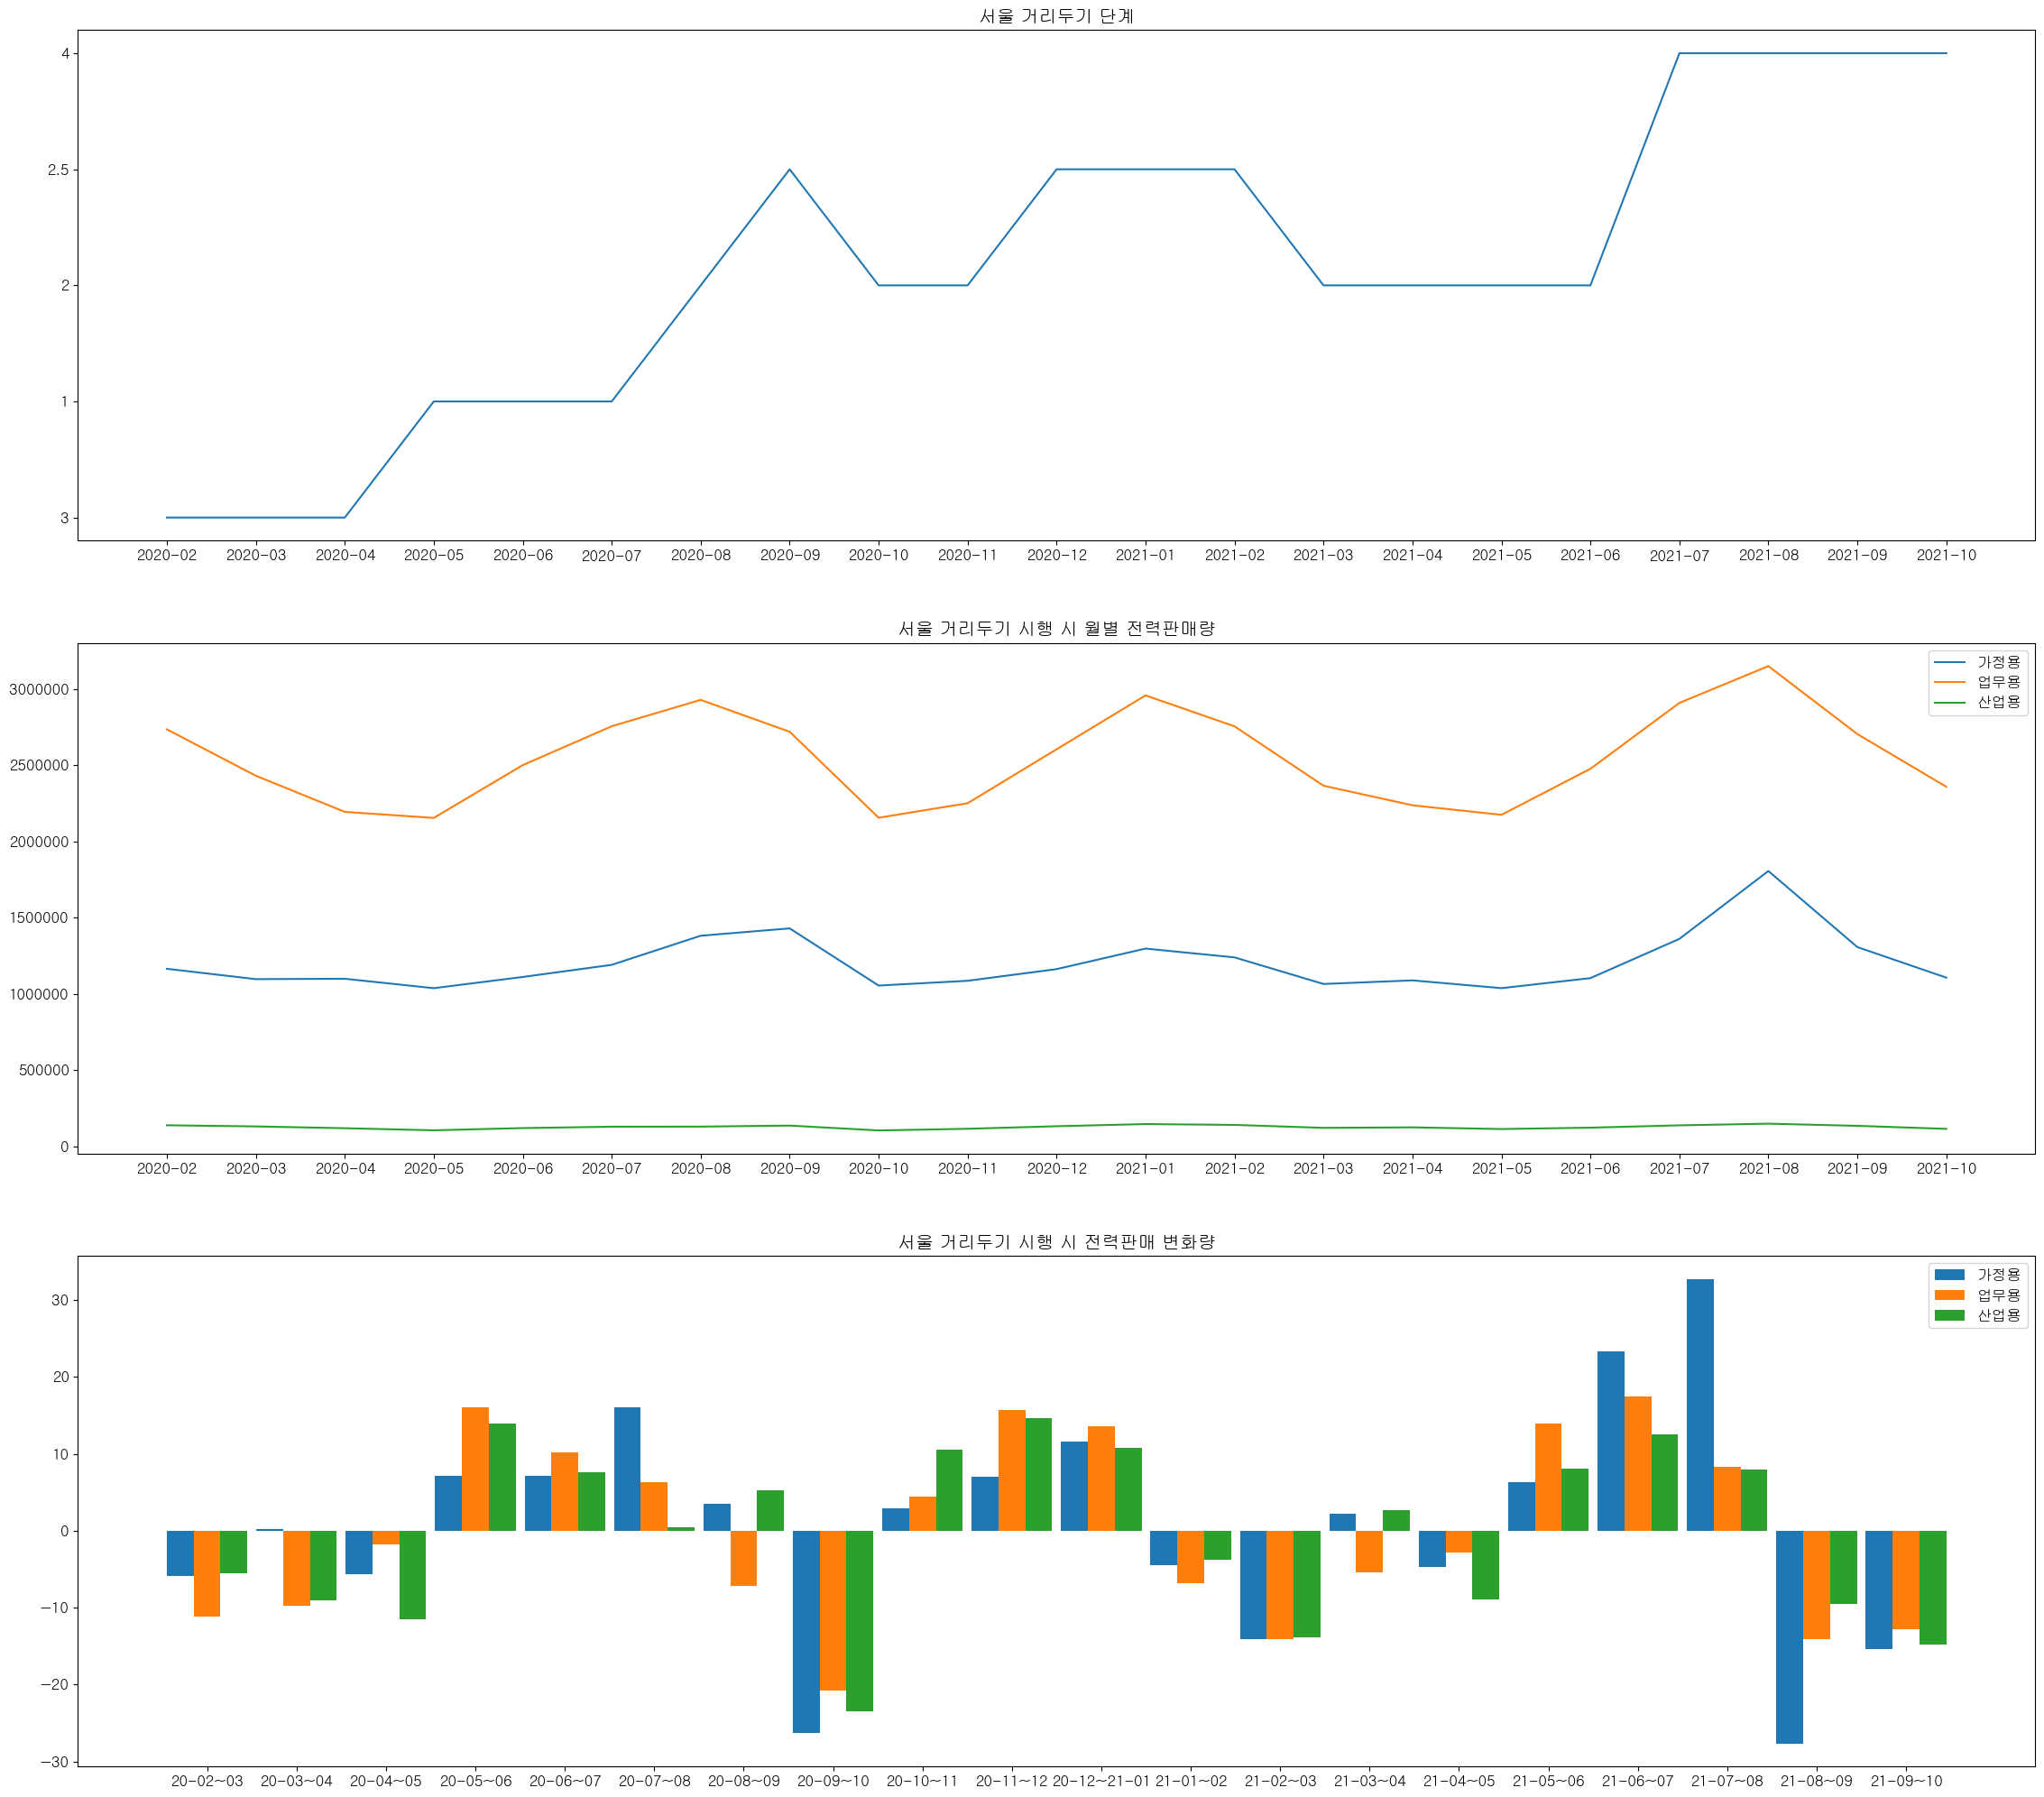

In [39]:
fig, ax = plt.subplots(3,1,figsize=(28,25))
ax[0].plot(월가정서울.iloc[:21].index,거리두기['서울'])
ax[0].set_title('서울 거리두기 단계')
ax[1].plot(월가정서울.iloc[:21],label = '가정용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].plot(월업무서울.iloc[:21],label = '업무용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].plot(월산업서울.iloc[:21],label = '산업용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].set_title('서울 거리두기 시행 시 월별 전력판매량')
ax[1].legend()
ax[2].bar(서울가정변화량.index-0.3,서울가정변화량.변화량,width=0.3,label='가정용')
ax[2].bar(서울업무변화량.index,서울업무변화량.변화량,width=0.3,label='업무용')
ax[2].bar(서울산업변화량.index+0.3,서울산업변화량.변화량,width=0.3,label='산업용')
ax[2].set_title('서울 거리두기 시행 시 전력판매 변화량')
ax[2].legend()
fig.show()

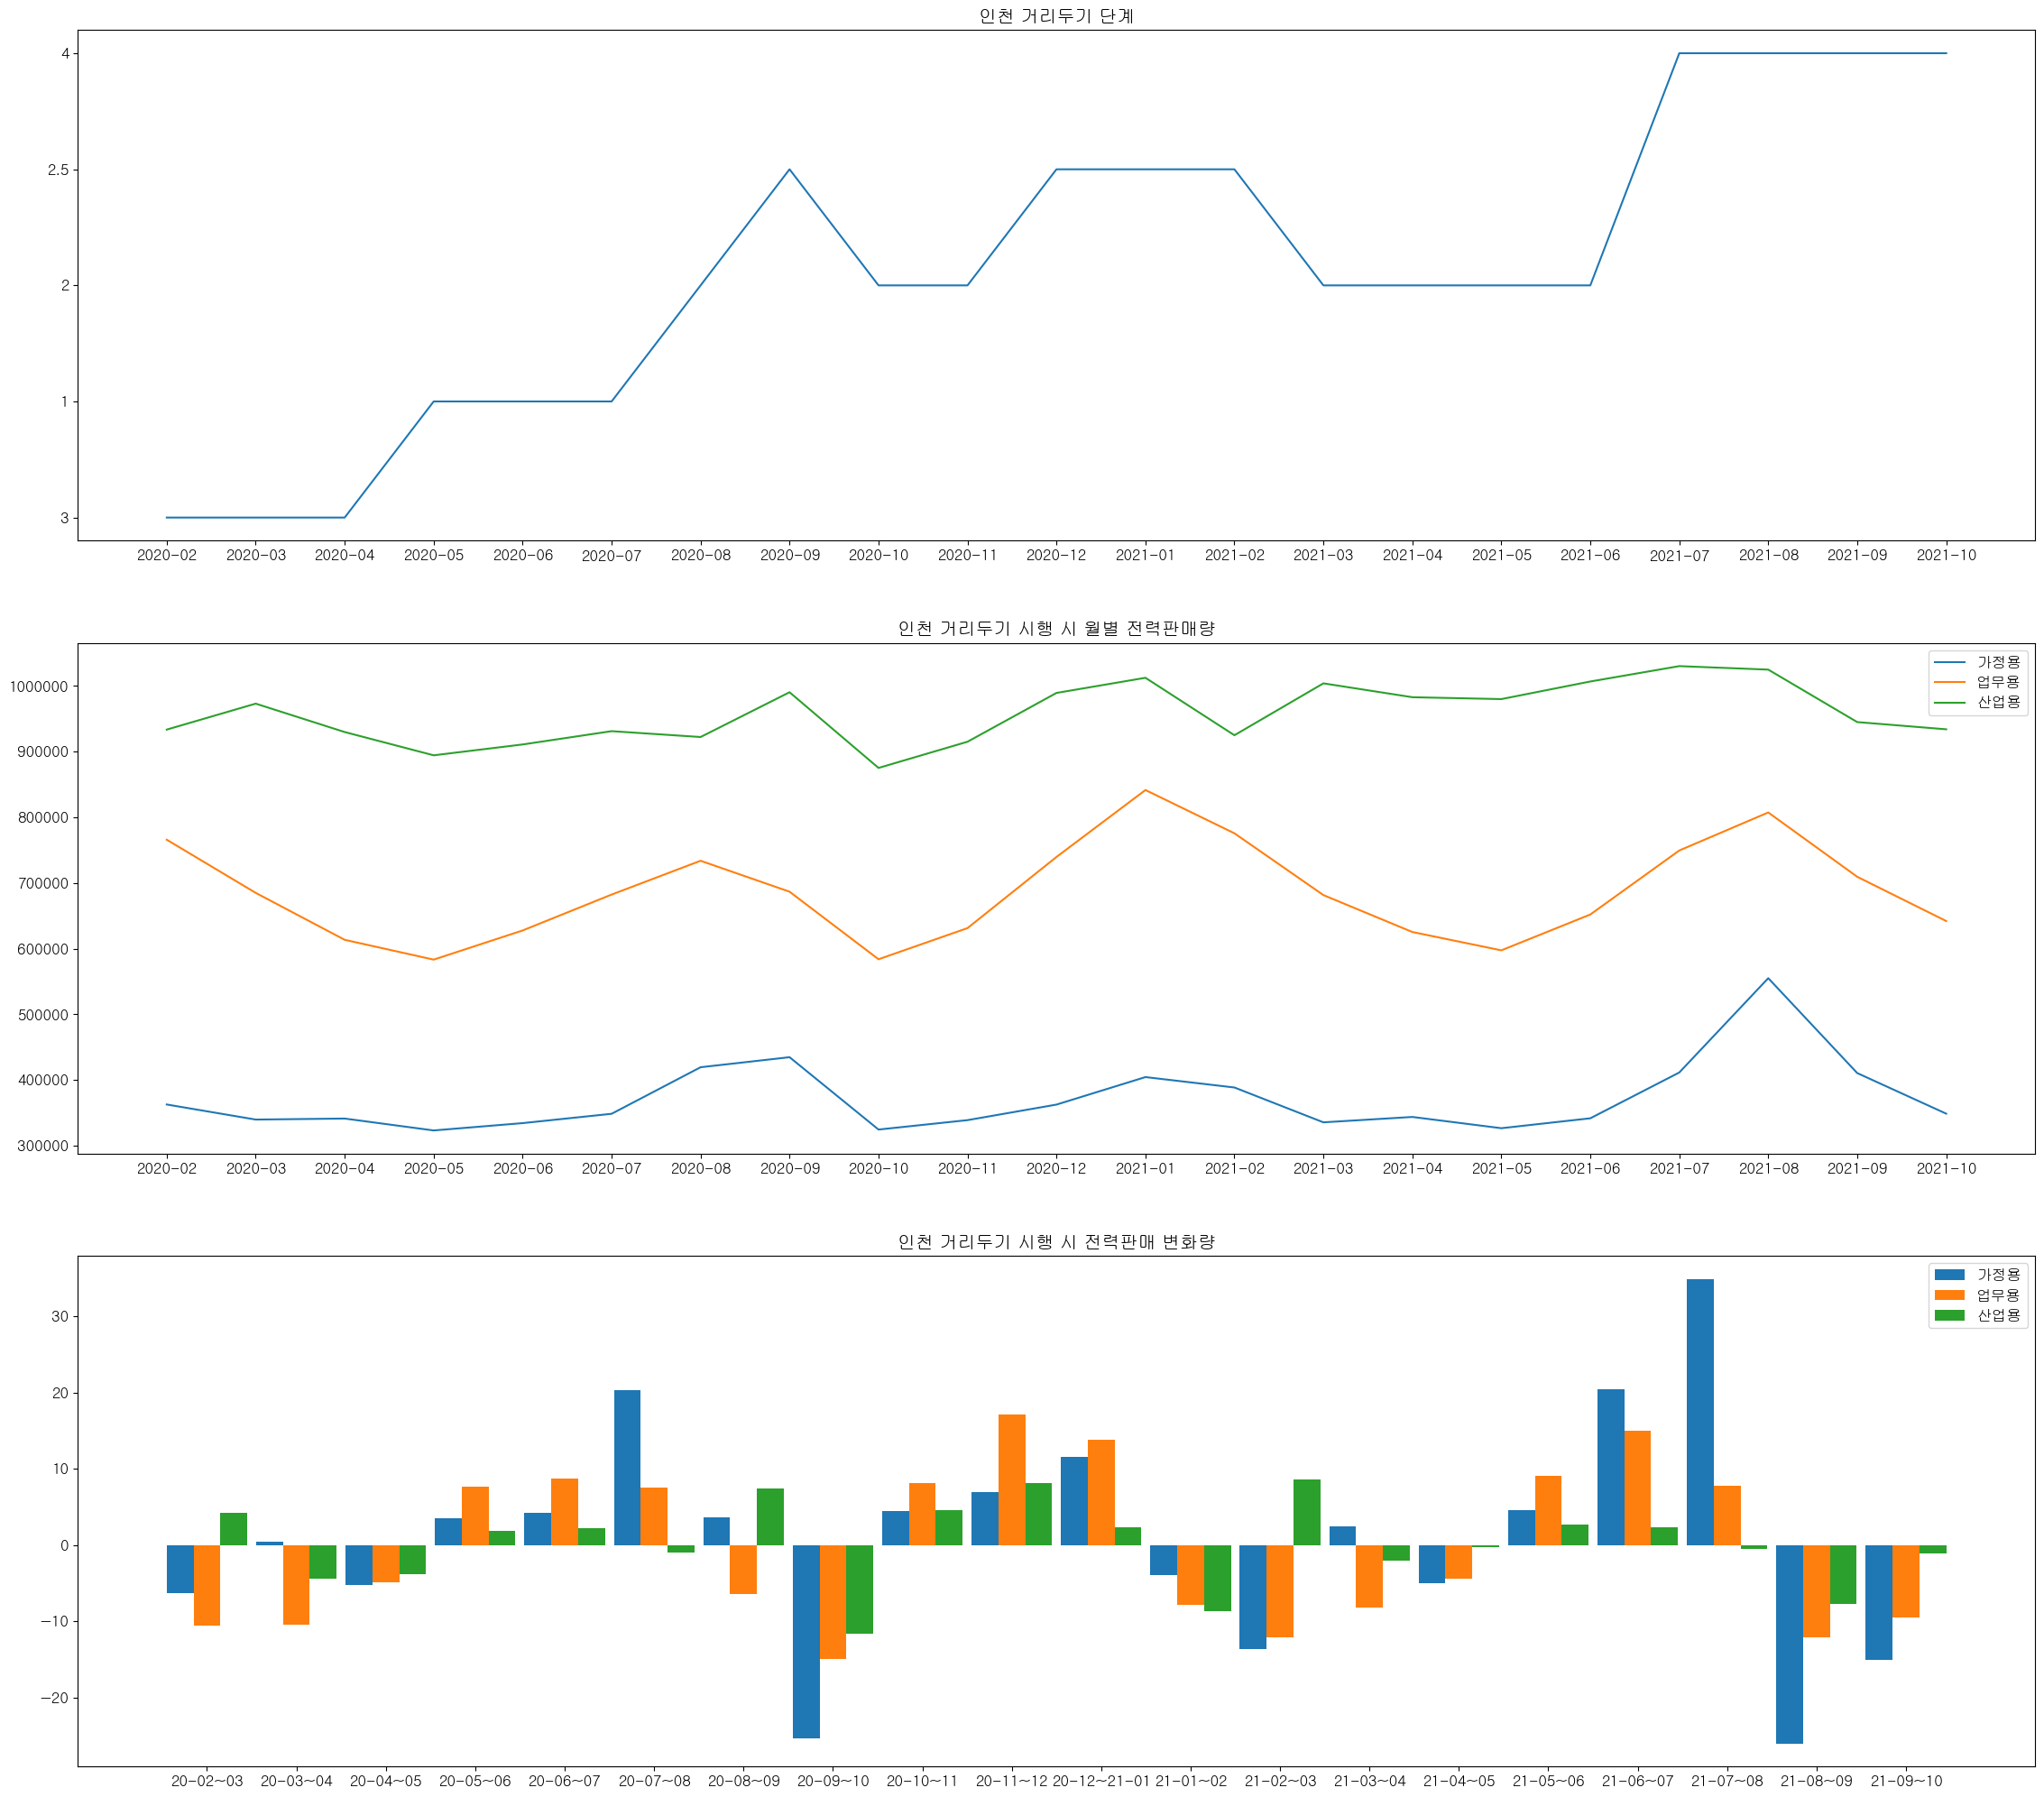

In [40]:
fig, ax = plt.subplots(3,1,figsize=(28,25))
ax[0].plot(월가정인천.iloc[:21].index,거리두기['인천'])
ax[0].set_title('인천 거리두기 단계')
ax[1].plot(월가정인천.iloc[:21],label = '가정용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].plot(월업무인천.iloc[:21],label = '업무용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].plot(월산업인천.iloc[:21],label = '산업용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].set_title('인천 거리두기 시행 시 월별 전력판매량')
ax[1].legend()
ax[2].bar(인천가정변화량.index-0.3,인천가정변화량.변화량,width=0.3,label='가정용')
ax[2].bar(인천업무변화량.index,인천업무변화량.변화량,width=0.3,label='업무용')
ax[2].bar(인천산업변화량.index+0.3,인천산업변화량.변화량,width=0.3,label='산업용')
ax[2].set_title('인천 거리두기 시행 시 전력판매 변화량')
ax[2].legend()
fig.show()

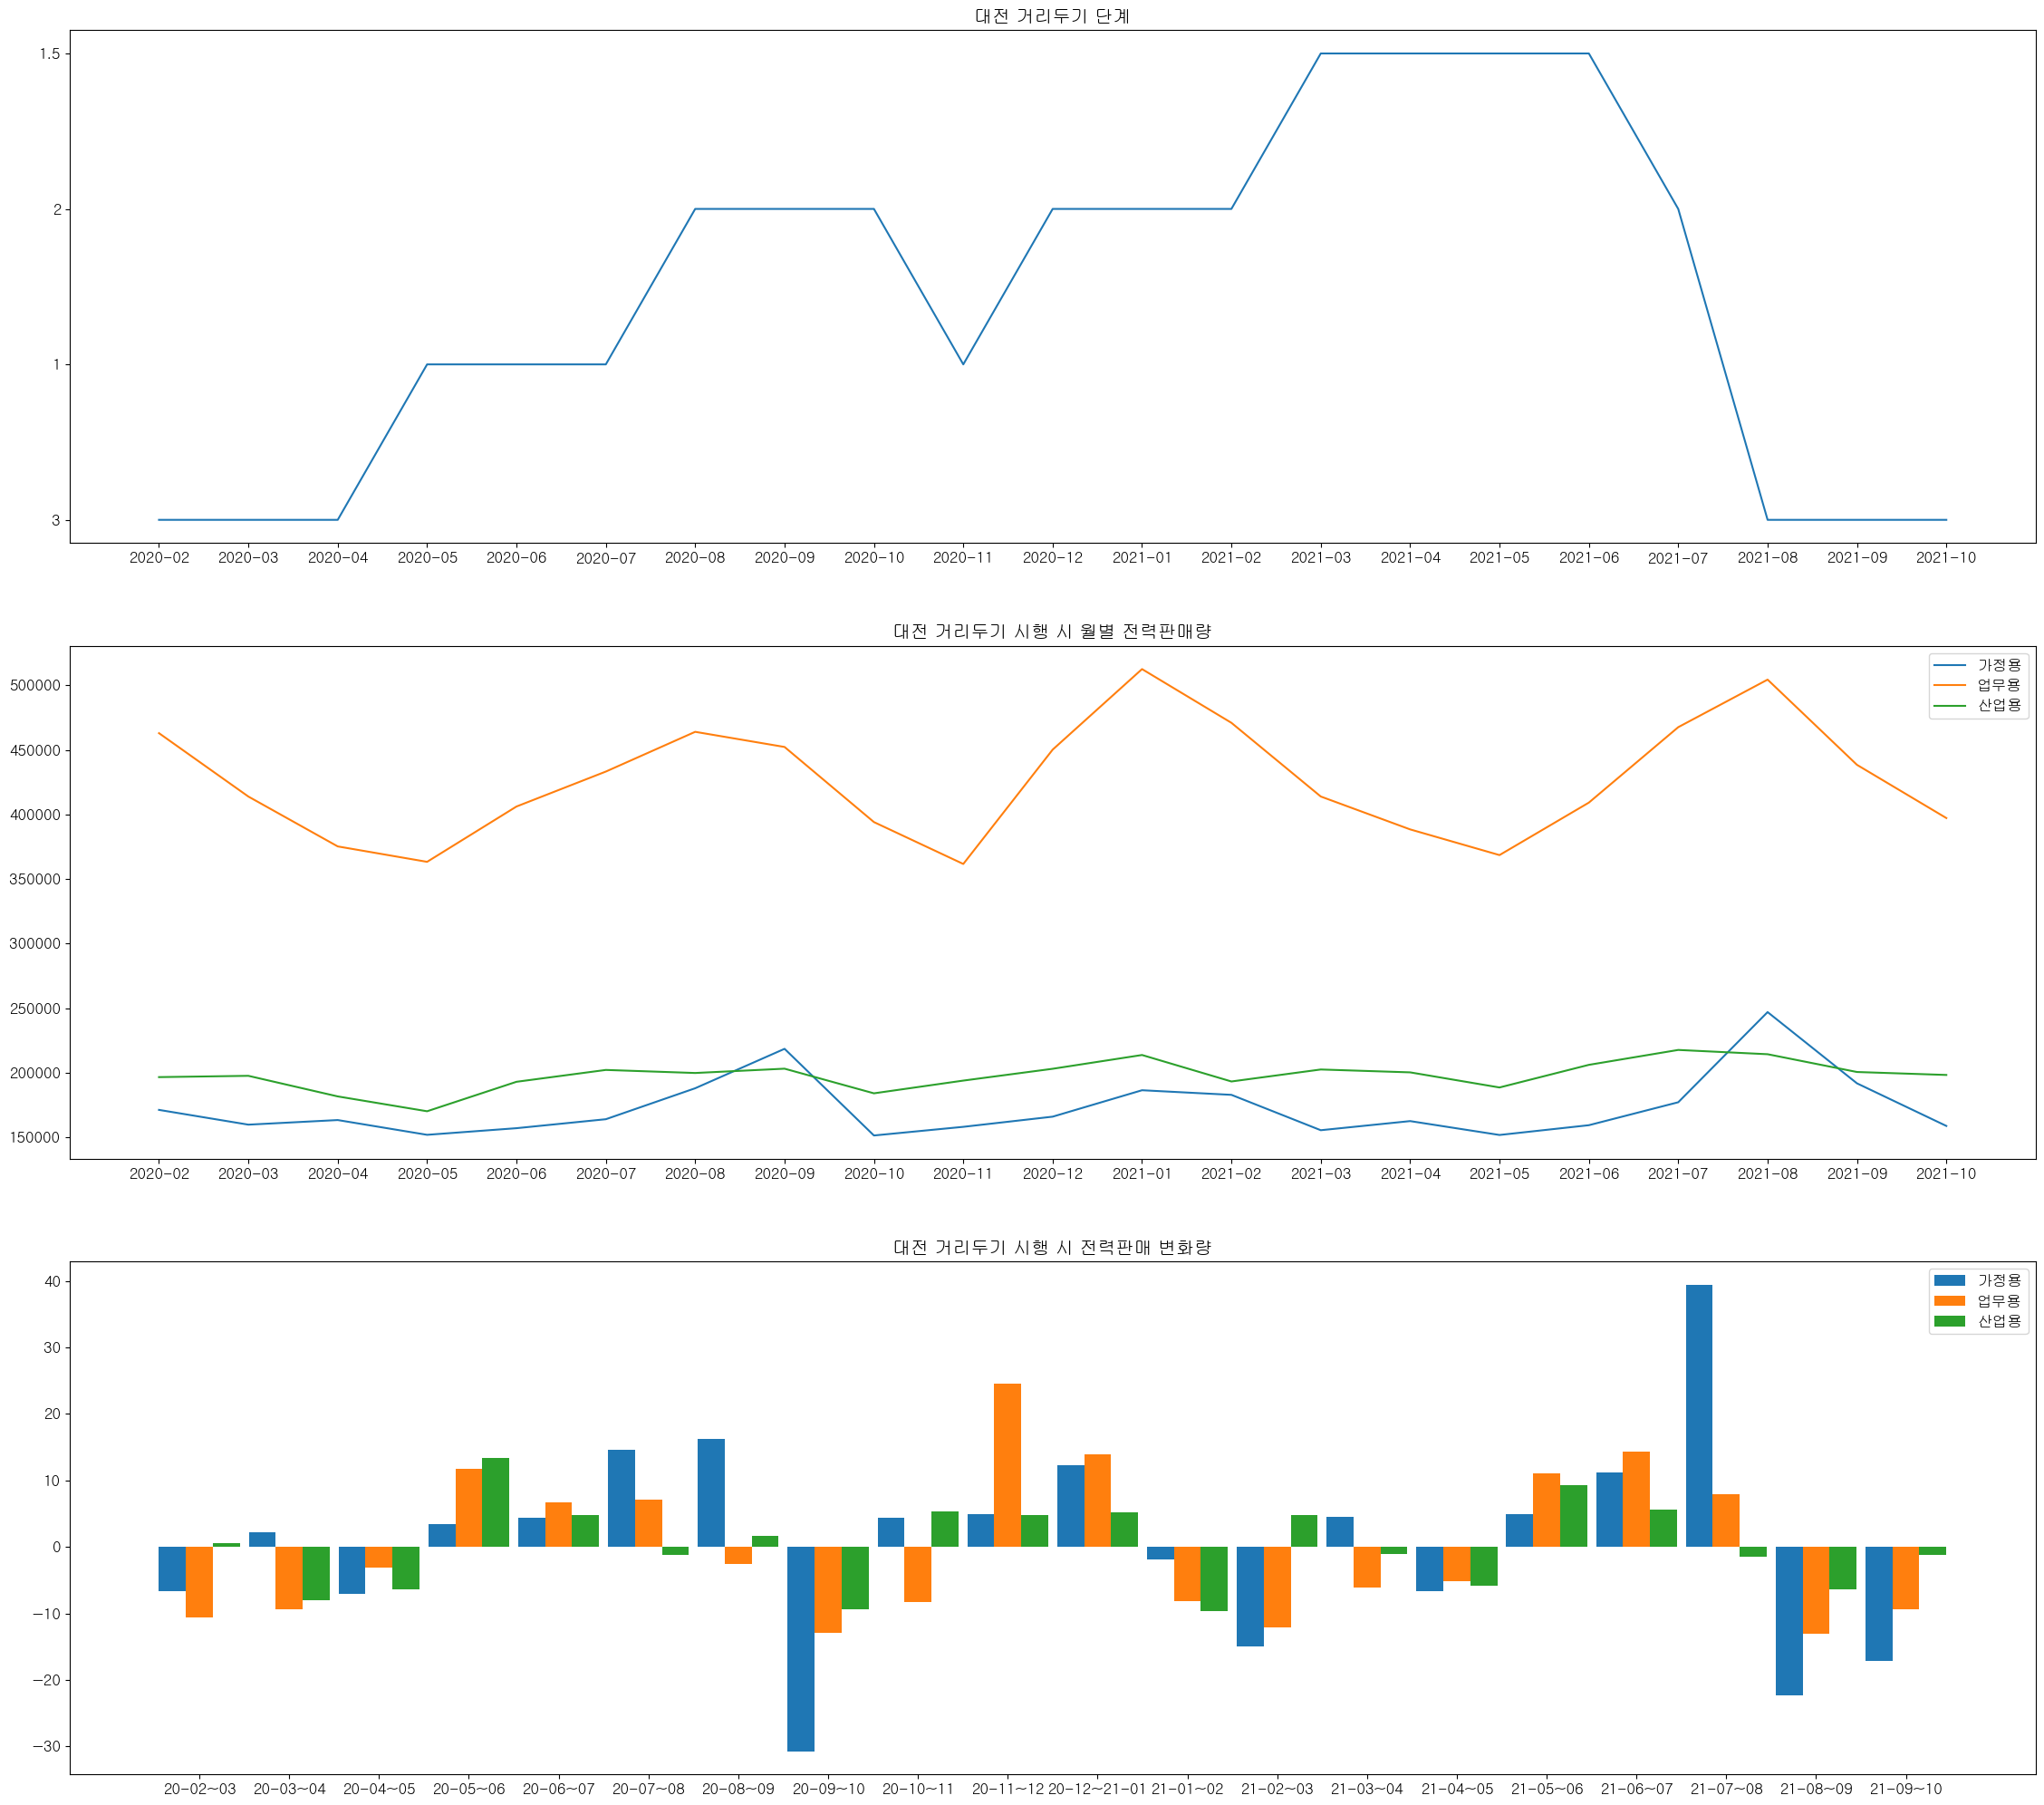

In [41]:
fig, ax = plt.subplots(3,1,figsize=(28,25))
ax[0].plot(월가정대전.iloc[:21].index,거리두기['대전'])
ax[0].set_title('대전 거리두기 단계')
ax[1].plot(월가정대전.iloc[:21],label = '가정용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].plot(월업무대전.iloc[:21],label = '업무용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].plot(월산업대전.iloc[:21],label = '산업용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].set_title('대전 거리두기 시행 시 월별 전력판매량')
ax[1].legend()
ax[2].bar(대전가정변화량.index-0.3,대전가정변화량.변화량,width=0.3,label='가정용')
ax[2].bar(대전업무변화량.index,대전업무변화량.변화량,width=0.3,label='업무용')
ax[2].bar(대전산업변화량.index+0.3,대전산업변화량.변화량,width=0.3,label='산업용')
ax[2].set_title('대전 거리두기 시행 시 전력판매 변화량')
ax[2].legend()
fig.show()

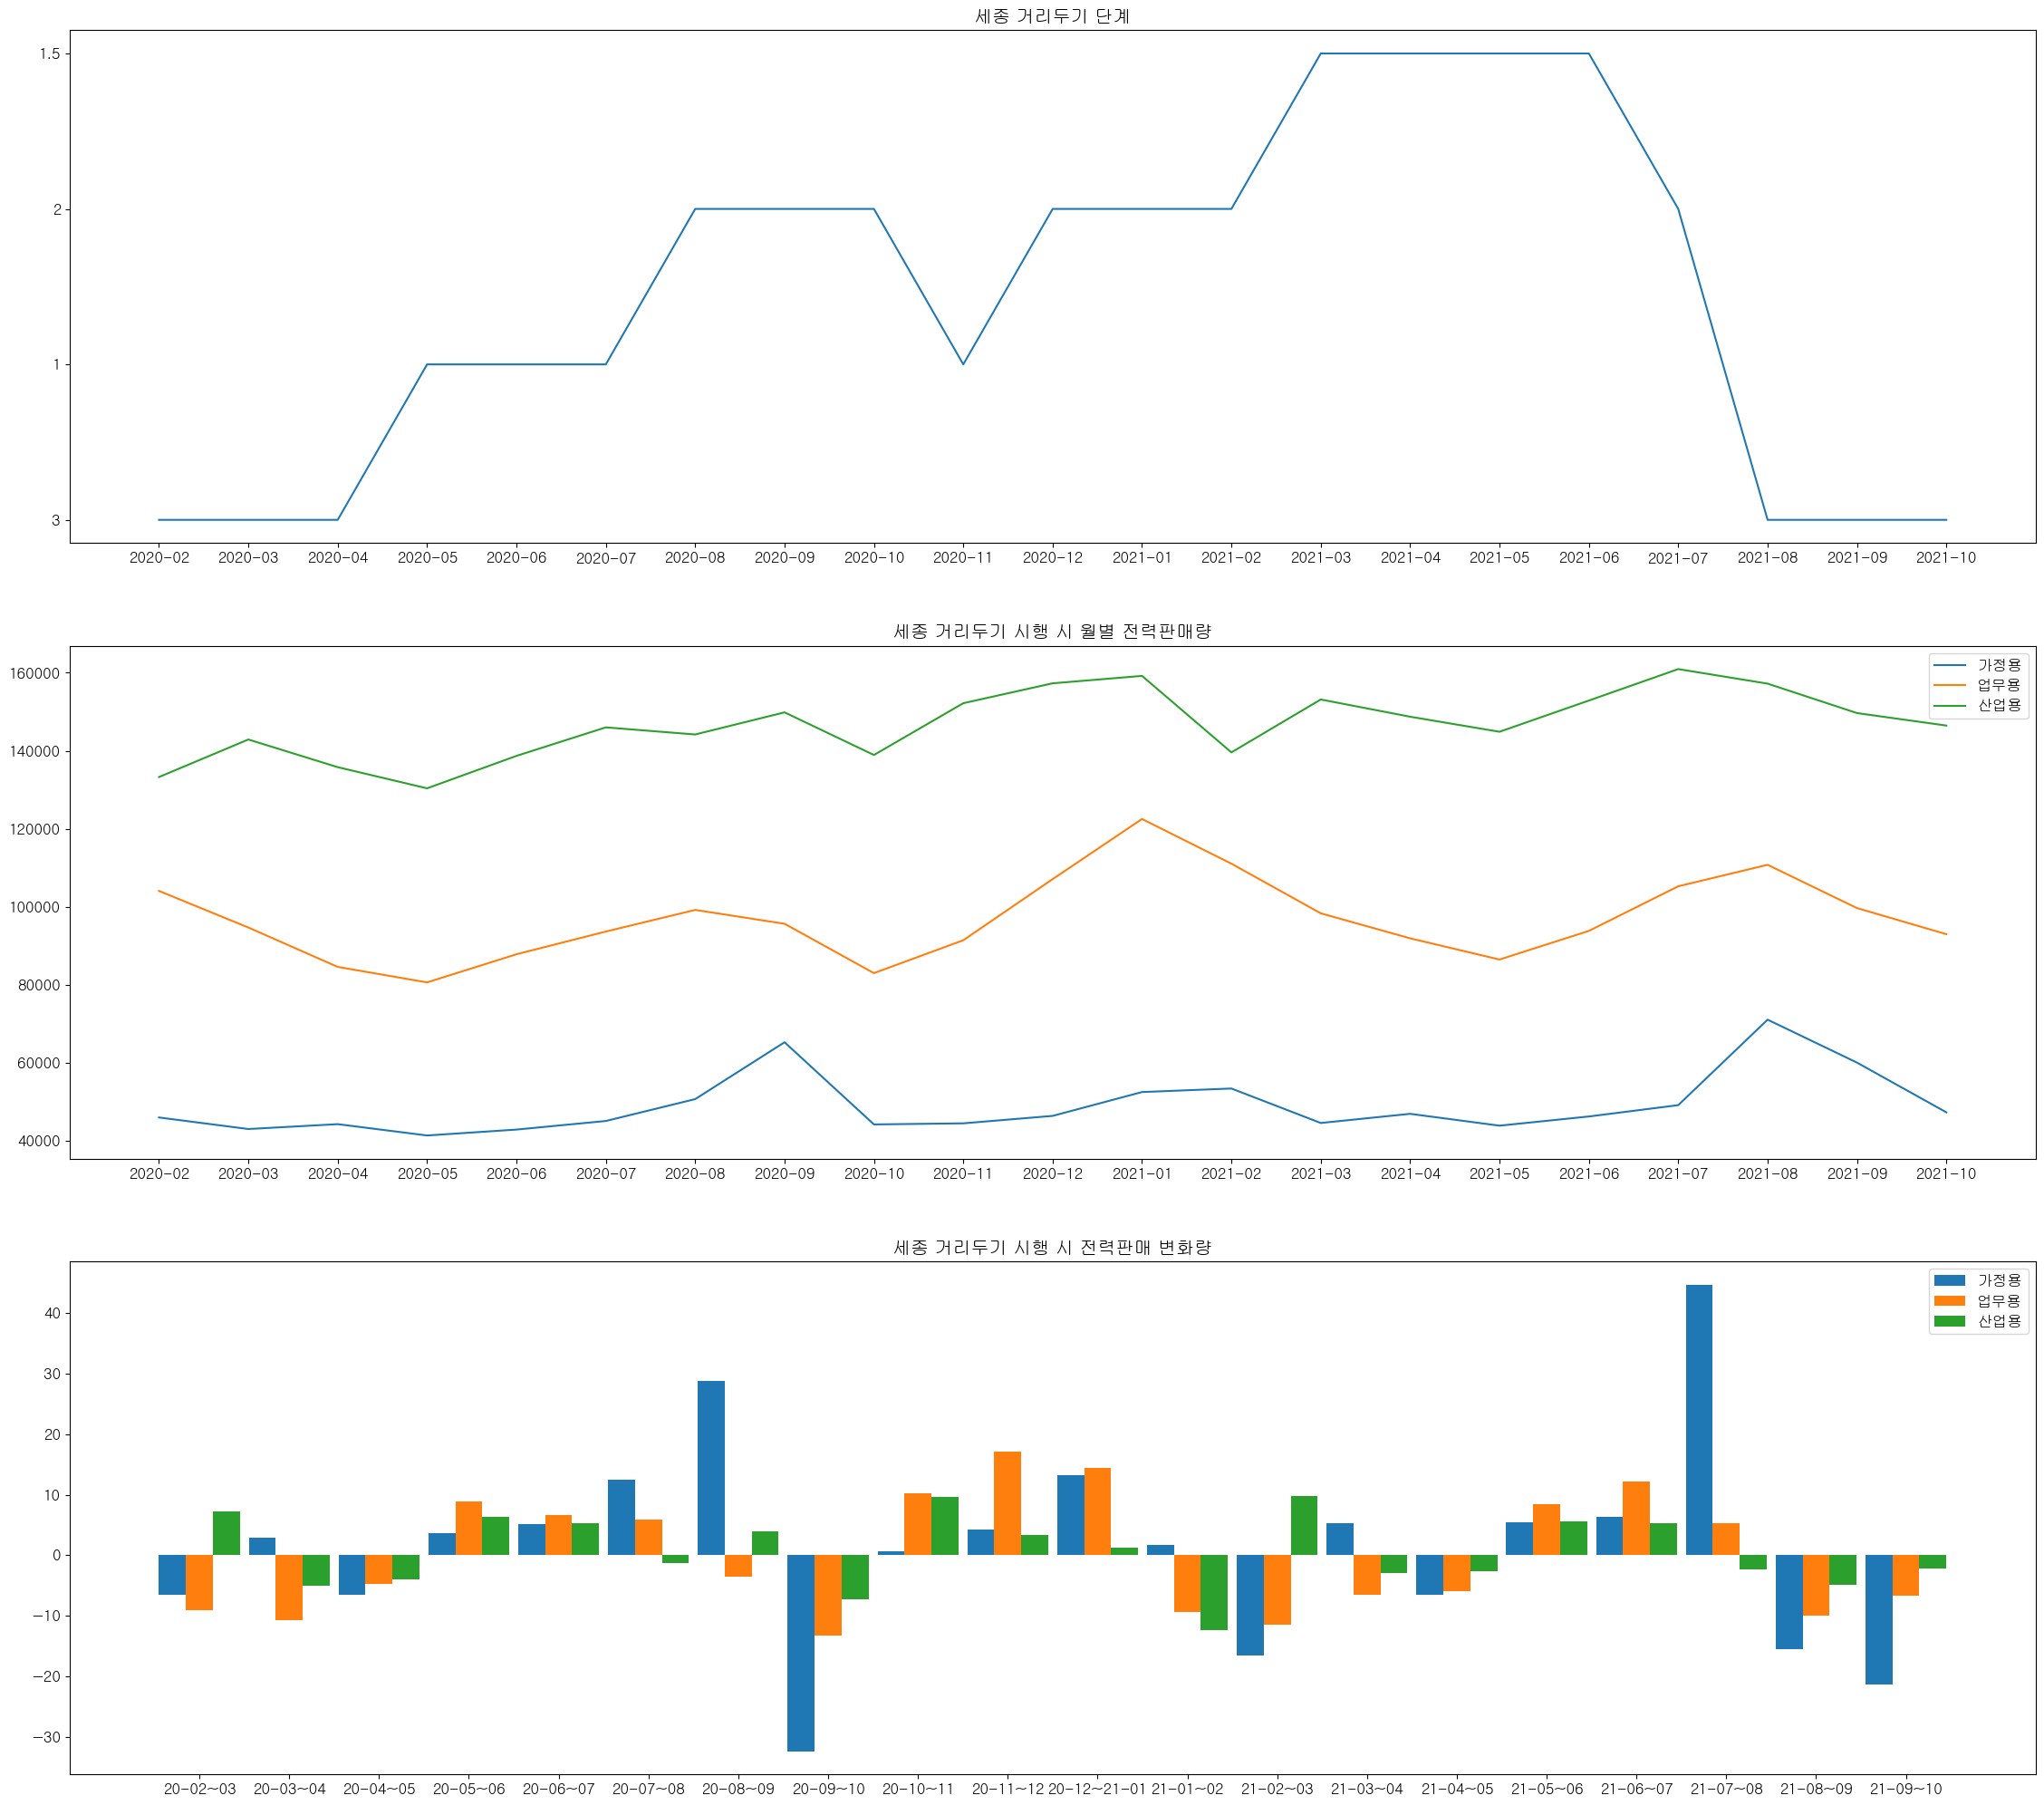

In [42]:
fig, ax = plt.subplots(3,1,figsize=(28,25))
ax[0].plot(월가정세종.iloc[:21].index,거리두기['세종'])
ax[0].set_title('세종 거리두기 단계')
ax[1].plot(월가정세종.iloc[:21],label = '가정용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].plot(월업무세종.iloc[:21],label = '업무용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].plot(월산업세종.iloc[:21],label = '산업용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].set_title('세종 거리두기 시행 시 월별 전력판매량')
ax[1].legend()
ax[2].bar(세종가정변화량.index-0.3,세종가정변화량.변화량,width=0.3,label='가정용')
ax[2].bar(세종업무변화량.index,세종업무변화량.변화량,width=0.3,label='업무용')
ax[2].bar(세종산업변화량.index+0.3,세종산업변화량.변화량,width=0.3,label='산업용')
ax[2].set_title('세종 거리두기 시행 시 전력판매 변화량')
ax[2].legend()
fig.show()

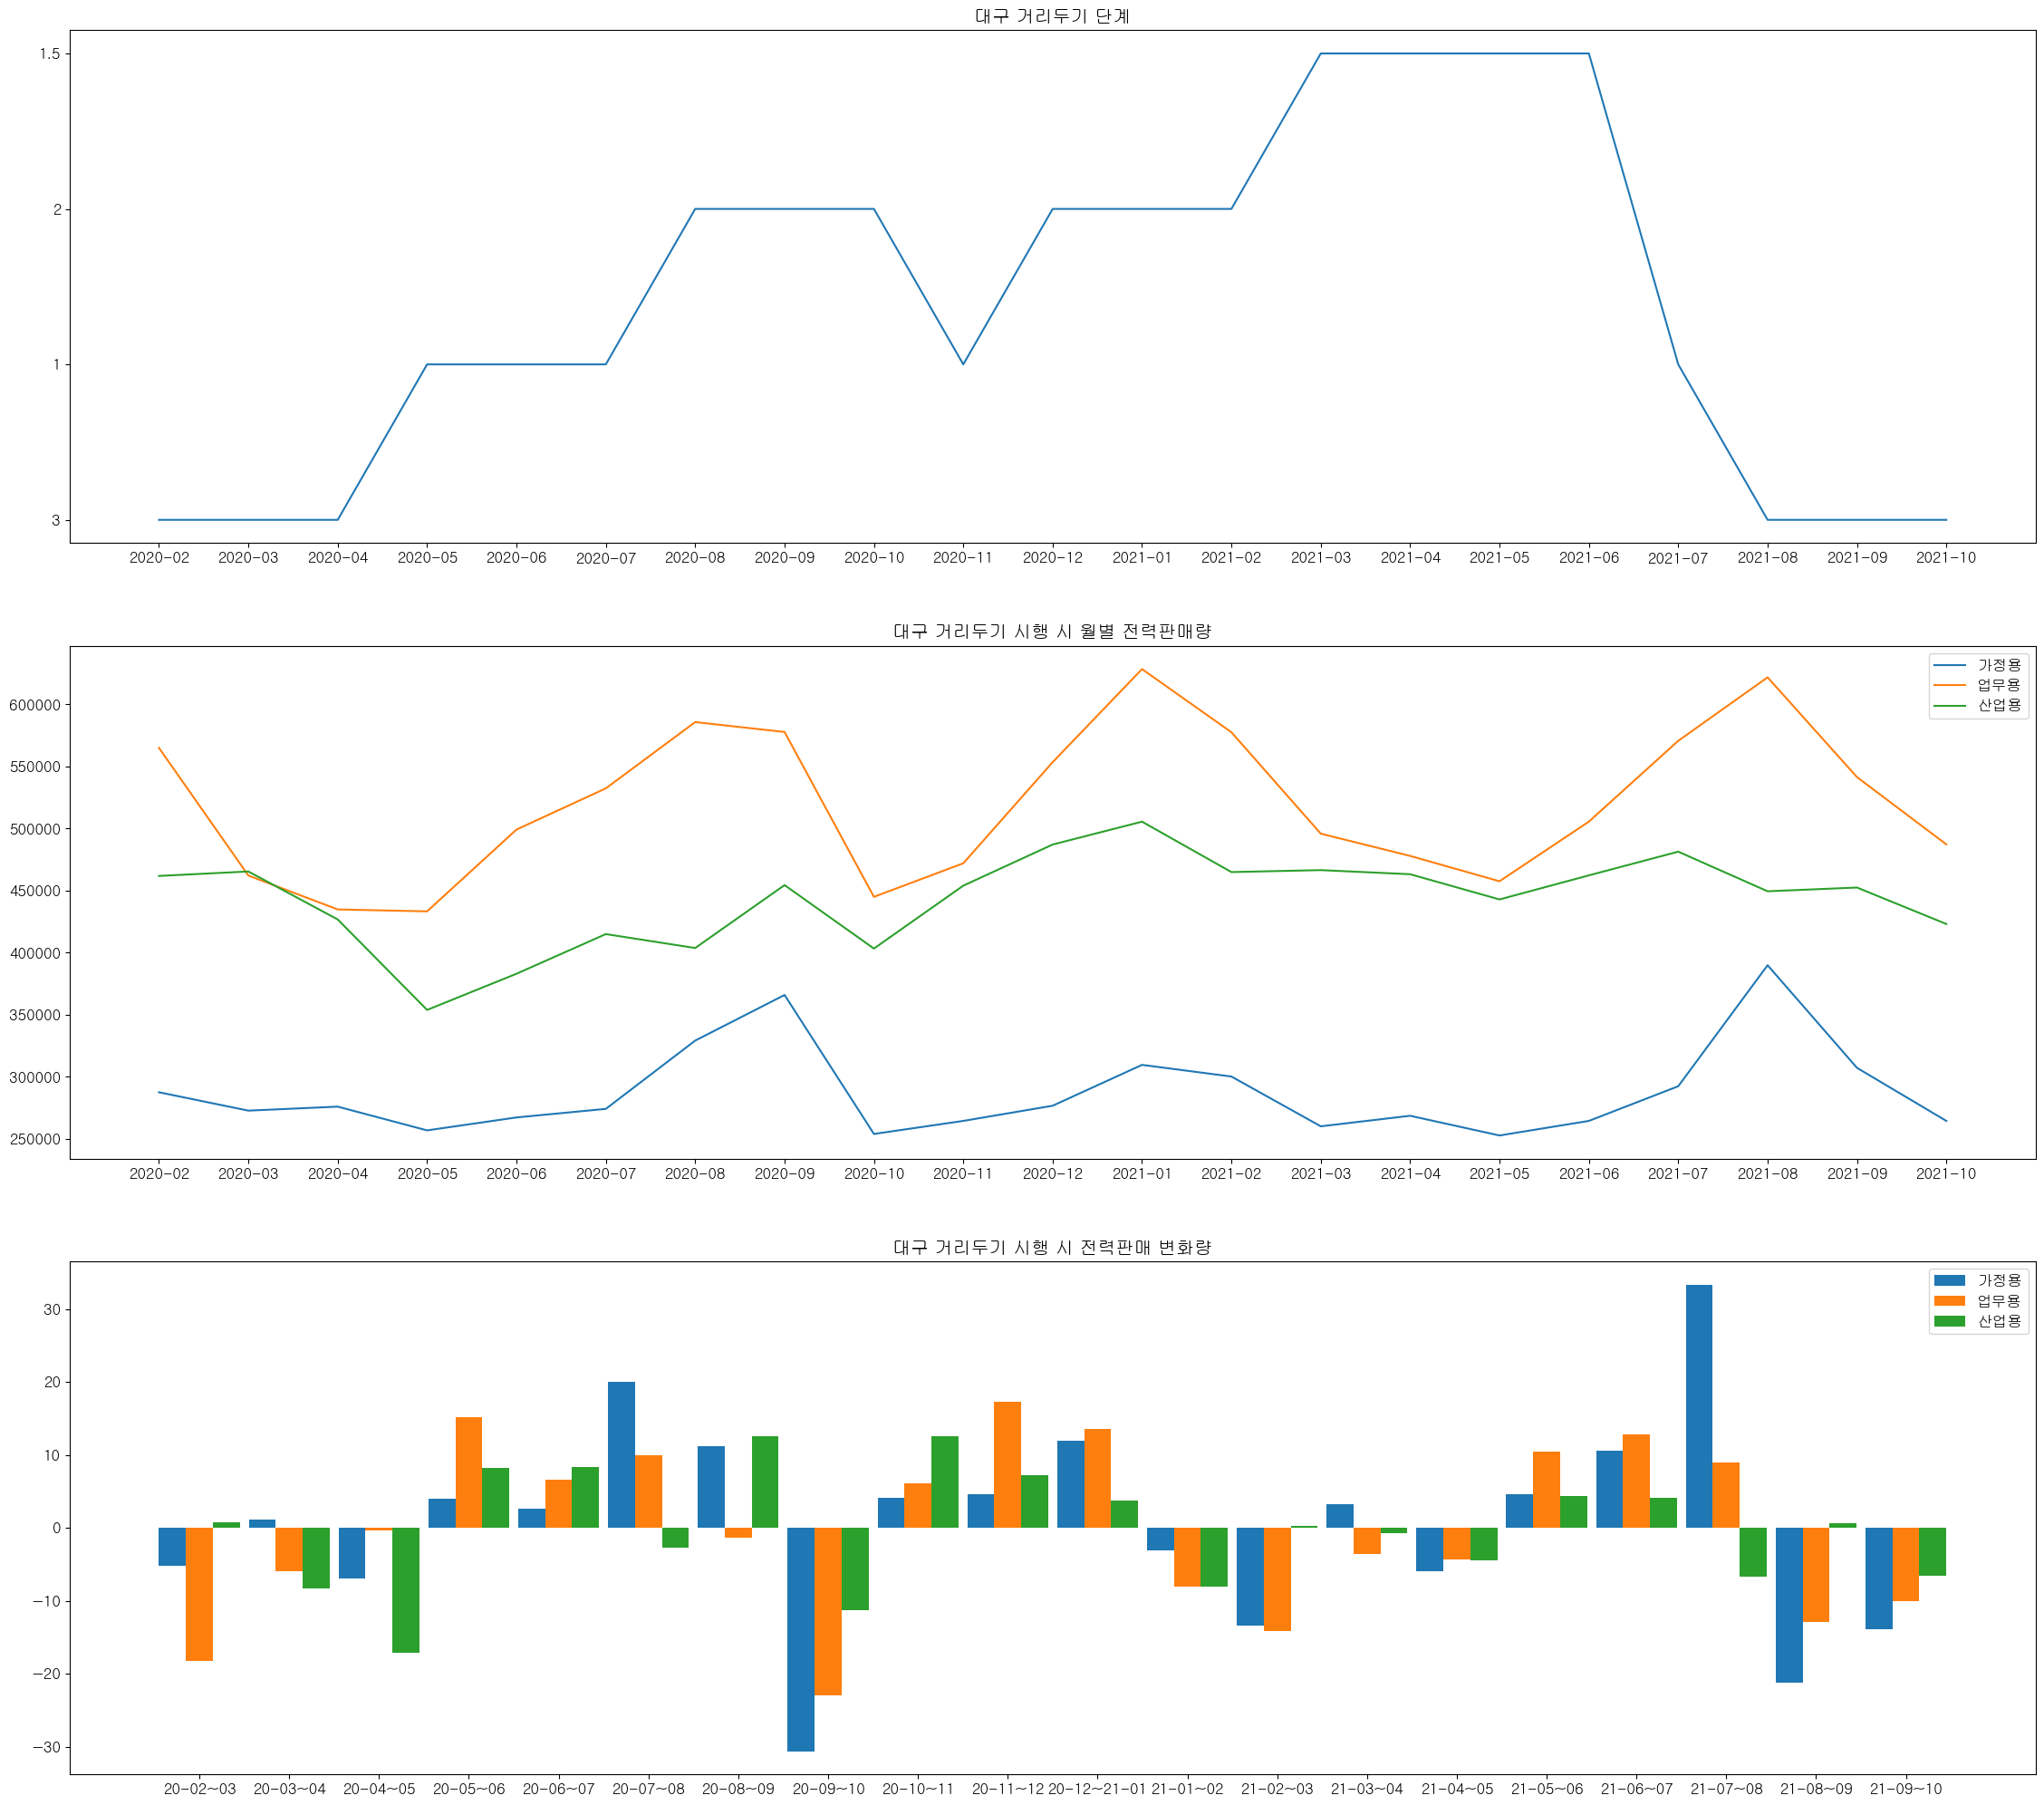

In [43]:
fig, ax = plt.subplots(3,1,figsize=(28,25))
ax[0].plot(월가정대구.iloc[:21].index,거리두기['대구'])
ax[0].set_title('대구 거리두기 단계')
ax[1].plot(월가정대구.iloc[:21],label = '가정용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].plot(월업무대구.iloc[:21],label = '업무용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].plot(월산업대구.iloc[:21],label = '산업용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].set_title('대구 거리두기 시행 시 월별 전력판매량')
ax[1].legend()
ax[2].bar(대구가정변화량.index-0.3,대구가정변화량.변화량,width=0.3,label='가정용')
ax[2].bar(대구업무변화량.index,대구업무변화량.변화량,width=0.3,label='업무용')
ax[2].bar(대구산업변화량.index+0.3,대구산업변화량.변화량,width=0.3,label='산업용')
ax[2].set_title('대구 거리두기 시행 시 전력판매 변화량')
ax[2].legend()
fig.show()

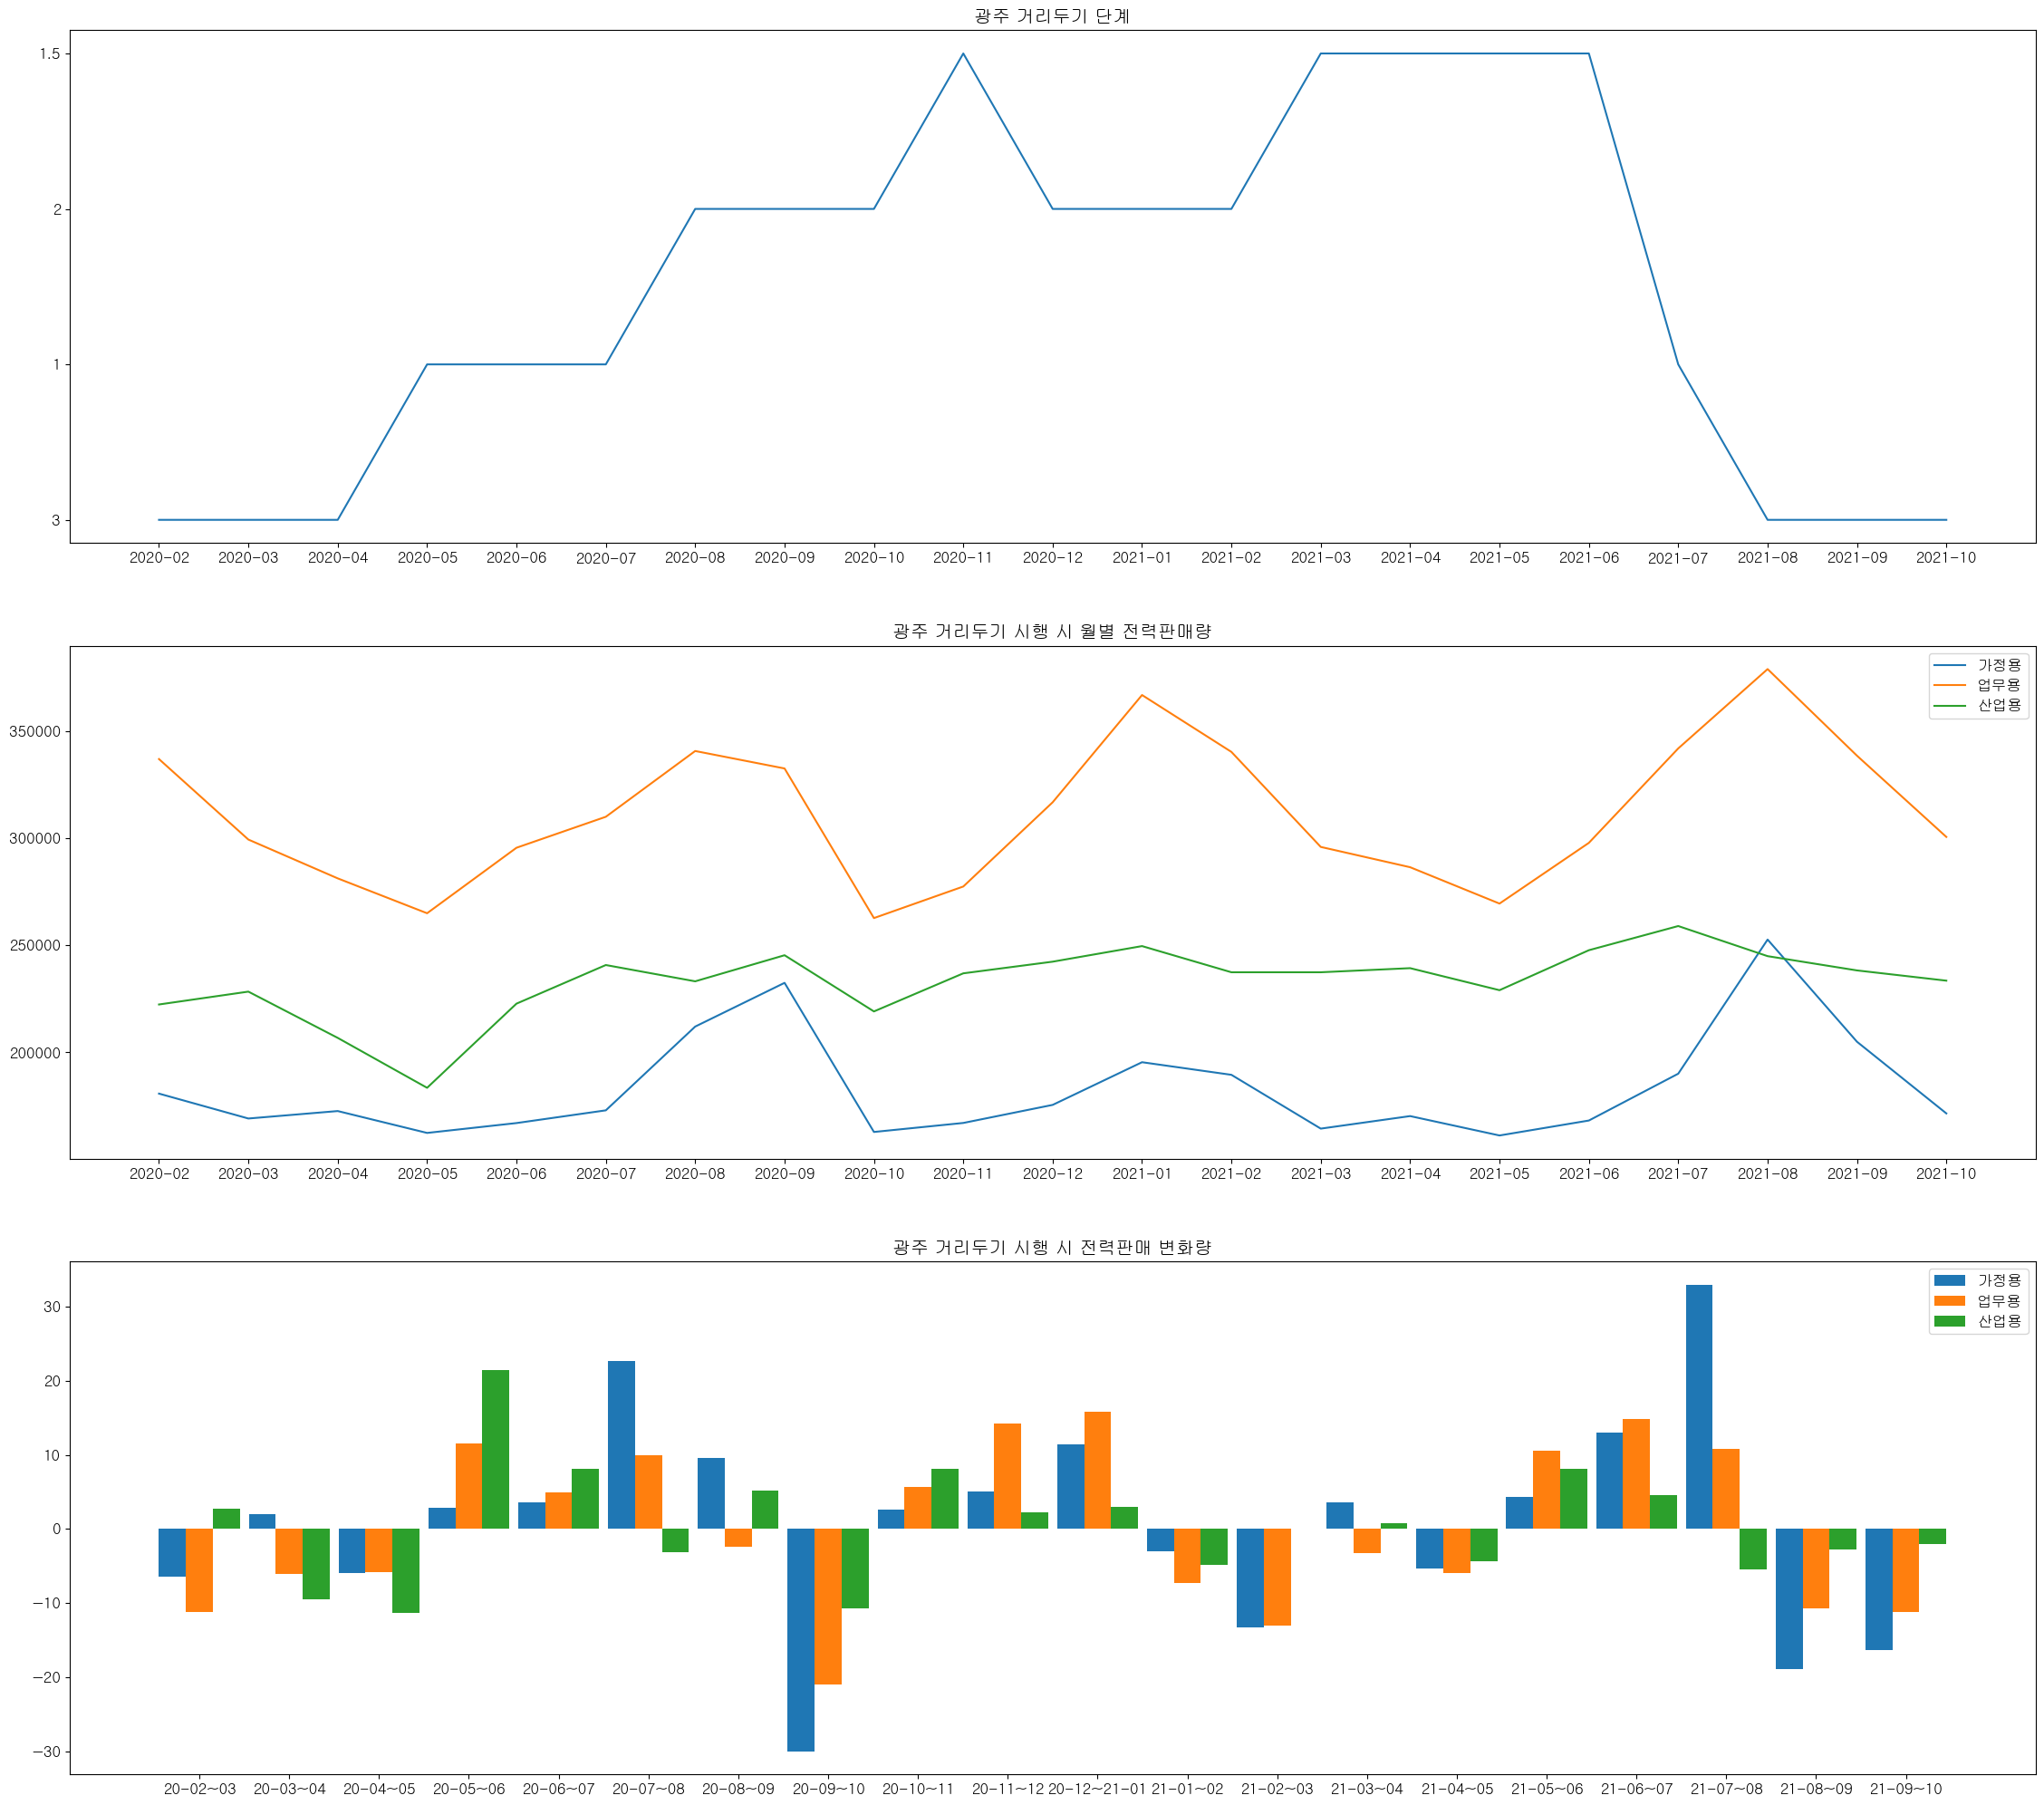

In [44]:
fig, ax = plt.subplots(3,1,figsize=(28,25))
ax[0].plot(월가정광주.iloc[:21].index,거리두기['광주'])
ax[0].set_title('광주 거리두기 단계')
ax[1].plot(월가정광주.iloc[:21],label = '가정용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].plot(월업무광주.iloc[:21],label = '업무용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].plot(월산업광주.iloc[:21],label = '산업용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].set_title('광주 거리두기 시행 시 월별 전력판매량')
ax[1].legend()
ax[2].bar(광주가정변화량.index-0.3,광주가정변화량.변화량,width=0.3,label='가정용')
ax[2].bar(광주업무변화량.index,광주업무변화량.변화량,width=0.3,label='업무용')
ax[2].bar(광주산업변화량.index+0.3,광주산업변화량.변화량,width=0.3,label='산업용')
ax[2].set_title('광주 거리두기 시행 시 전력판매 변화량')
ax[2].legend()
fig.show()

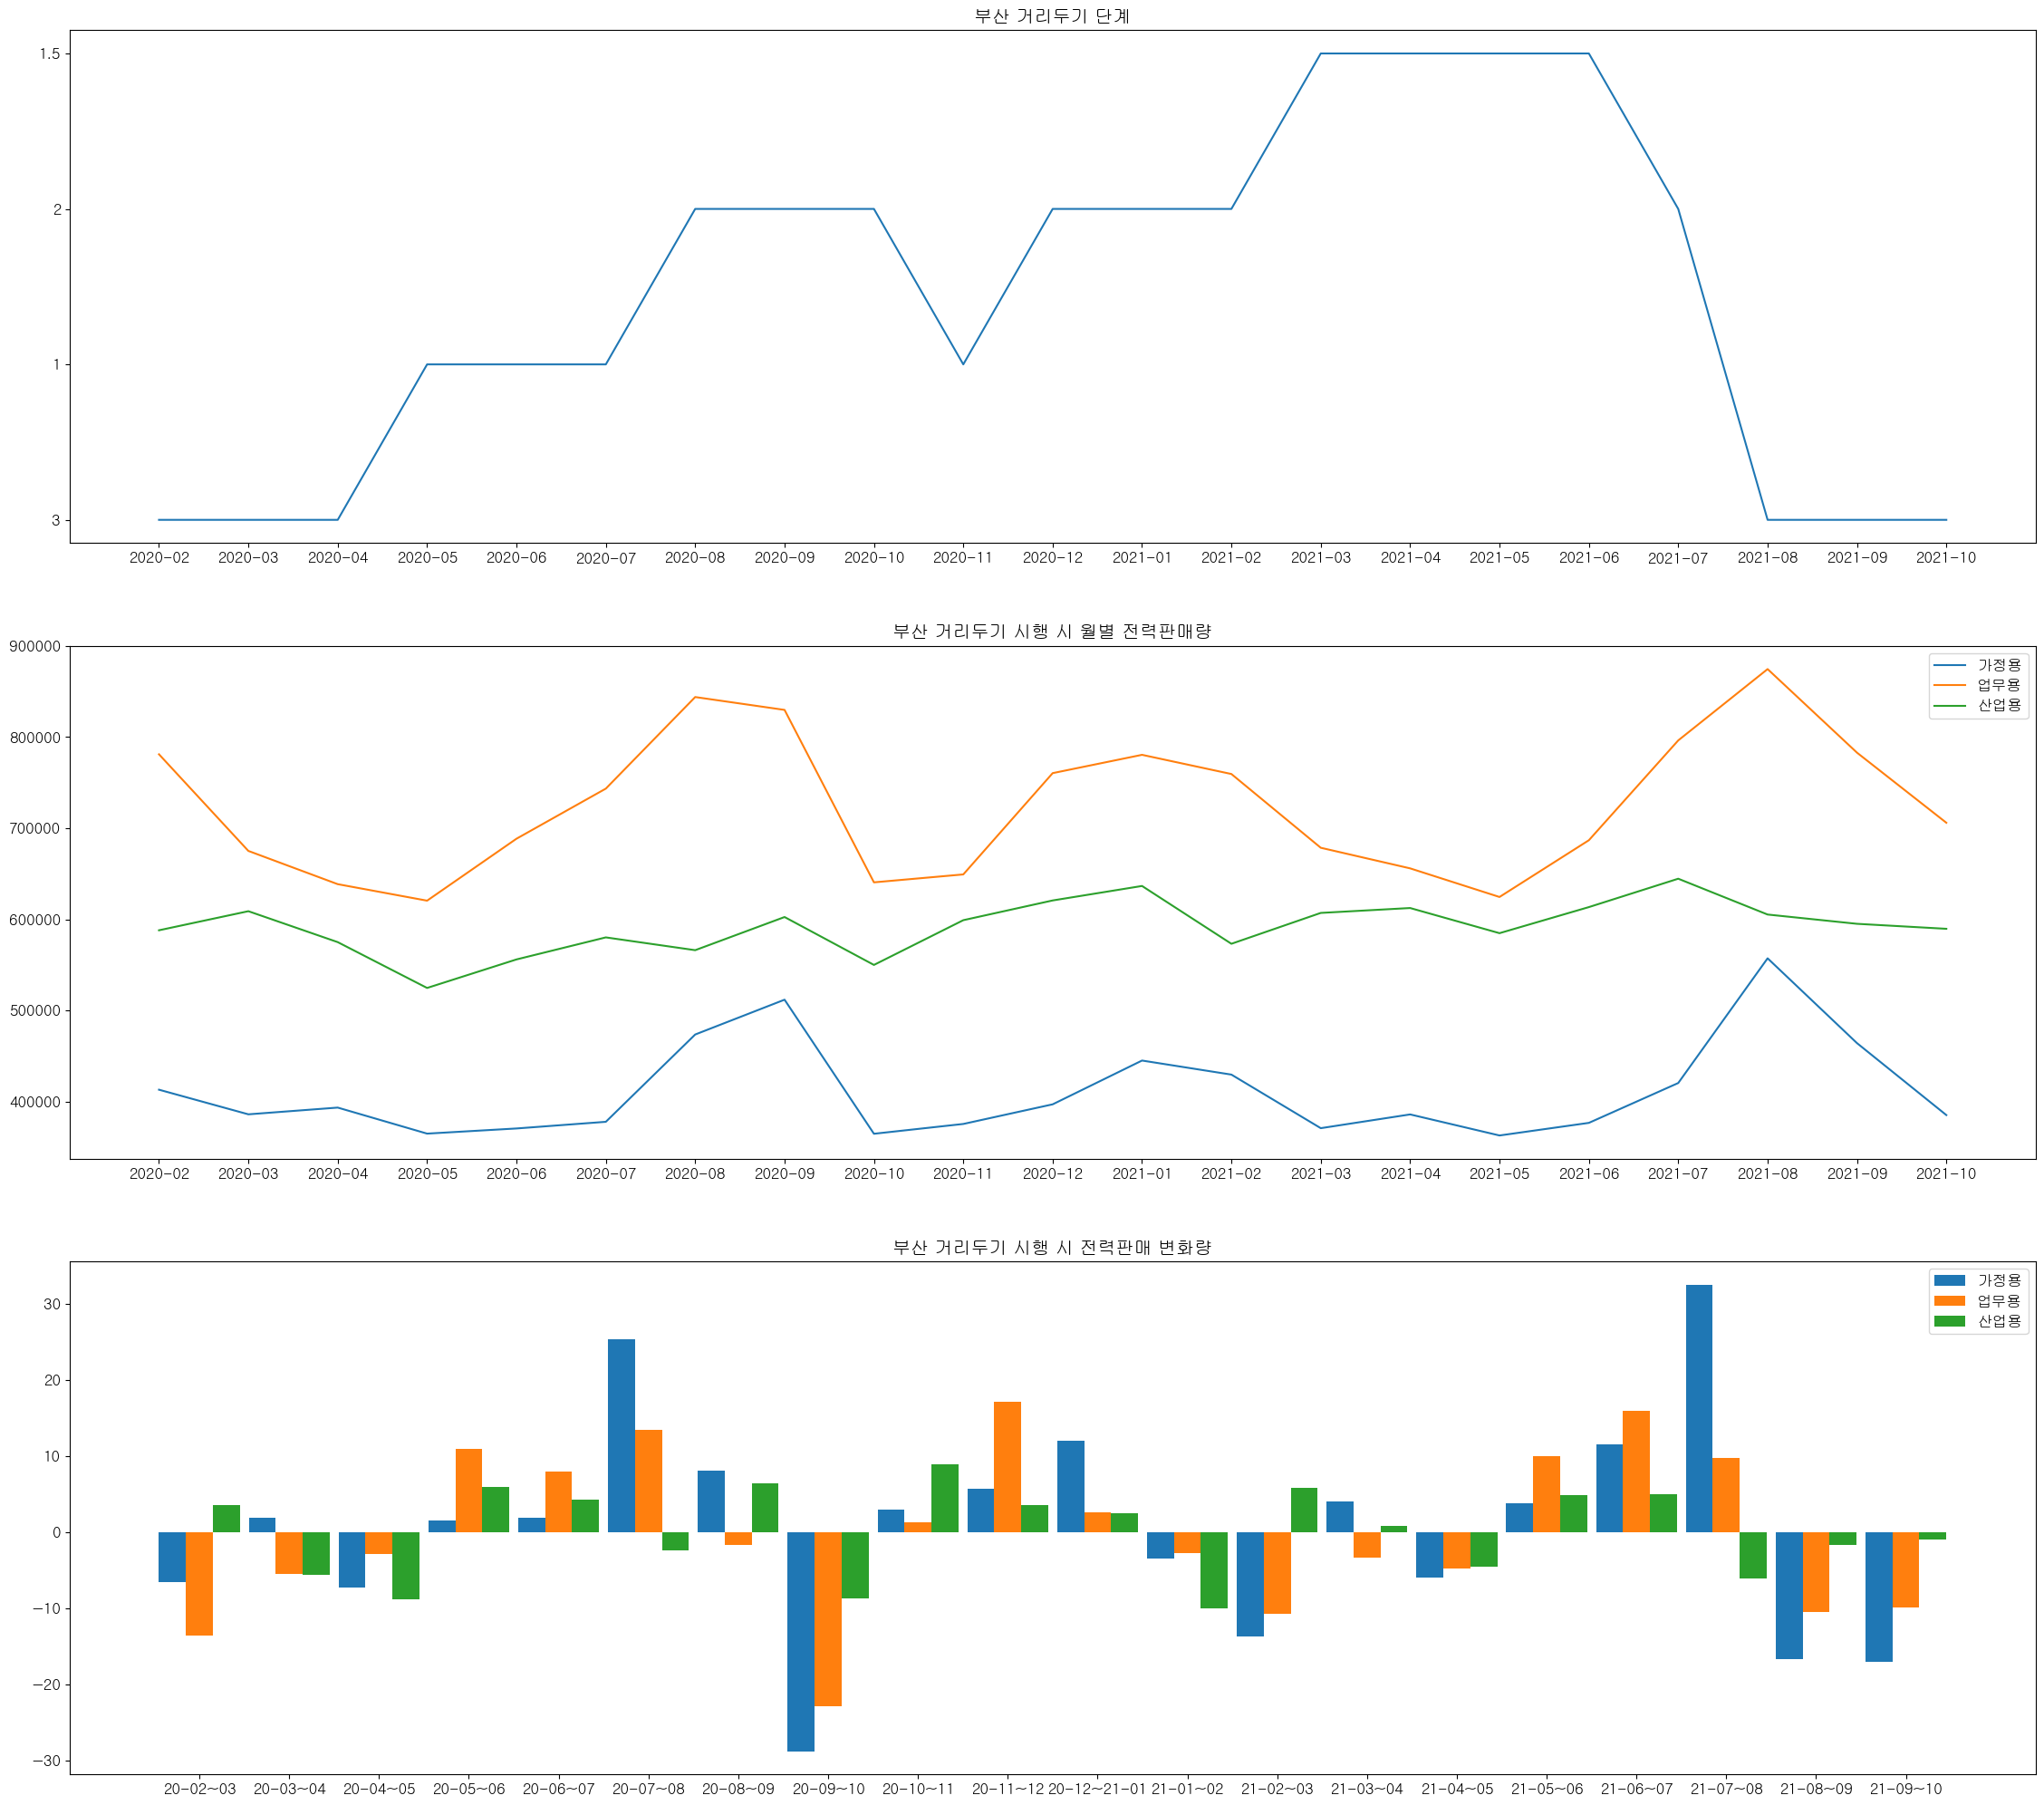

In [45]:
fig, ax = plt.subplots(3,1,figsize=(28,25))
ax[0].plot(월가정부산.iloc[:21].index,거리두기['부산'])
ax[0].set_title('부산 거리두기 단계')
ax[1].plot(월가정부산.iloc[:21],label = '가정용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].plot(월업무부산.iloc[:21],label = '업무용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].plot(월산업부산.iloc[:21],label = '산업용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].set_title('부산 거리두기 시행 시 월별 전력판매량')
ax[1].legend()
ax[2].bar(부산가정변화량.index-0.3,부산가정변화량.변화량,width=0.3,label='가정용')
ax[2].bar(부산업무변화량.index,부산업무변화량.변화량,width=0.3,label='업무용')
ax[2].bar(부산산업변화량.index+0.3,부산산업변화량.변화량,width=0.3,label='산업용')
ax[2].set_title('부산 거리두기 시행 시 전력판매 변화량')
ax[2].legend()
fig.show()

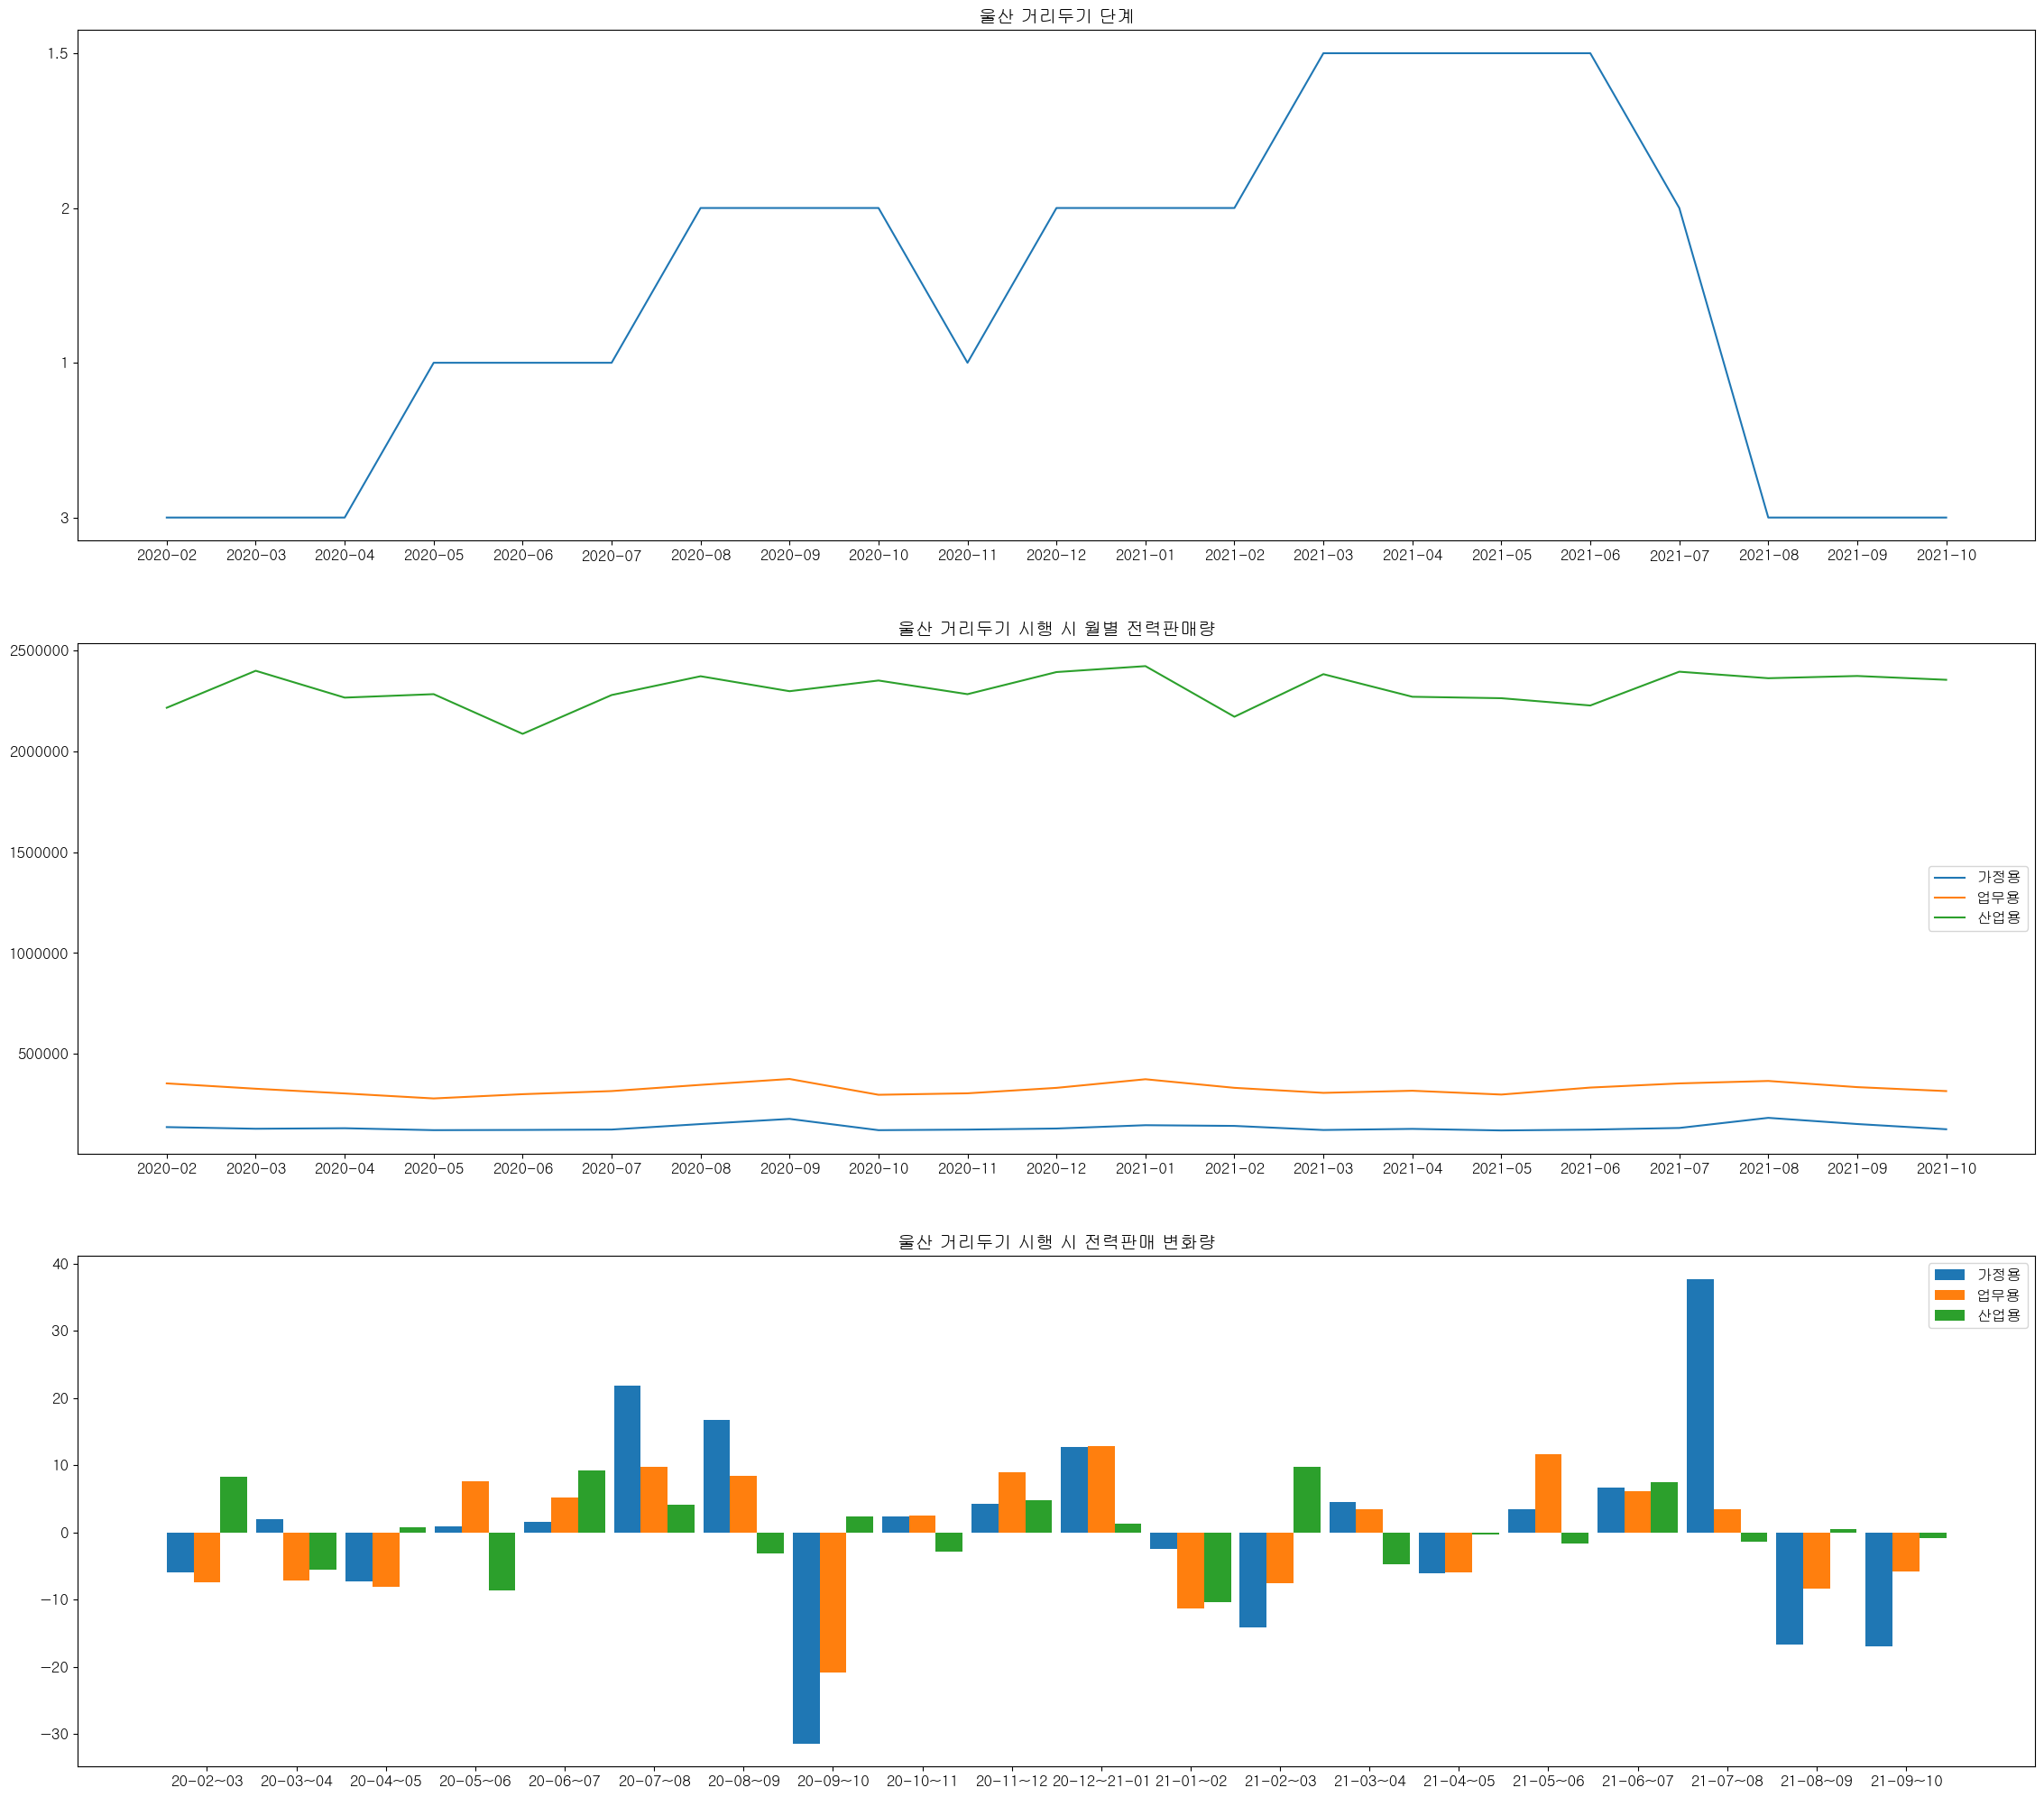

In [46]:
fig, ax = plt.subplots(3,1,figsize=(28,25))
ax[0].plot(월가정울산.iloc[:21].index,거리두기['울산'])
ax[0].set_title('울산 거리두기 단계')
ax[1].plot(월가정울산.iloc[:21],label = '가정용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].plot(월업무울산.iloc[:21],label = '업무용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].plot(월산업울산.iloc[:21],label = '산업용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].set_title('울산 거리두기 시행 시 월별 전력판매량')
ax[1].legend()
ax[2].bar(울산가정변화량.index-0.3,울산가정변화량.변화량,width=0.3,label='가정용')
ax[2].bar(울산업무변화량.index,울산업무변화량.변화량,width=0.3,label='업무용')
ax[2].bar(울산산업변화량.index+0.3,울산산업변화량.변화량,width=0.3,label='산업용')
ax[2].set_title('울산 거리두기 시행 시 전력판매 변화량')
ax[2].legend()
fig.show()

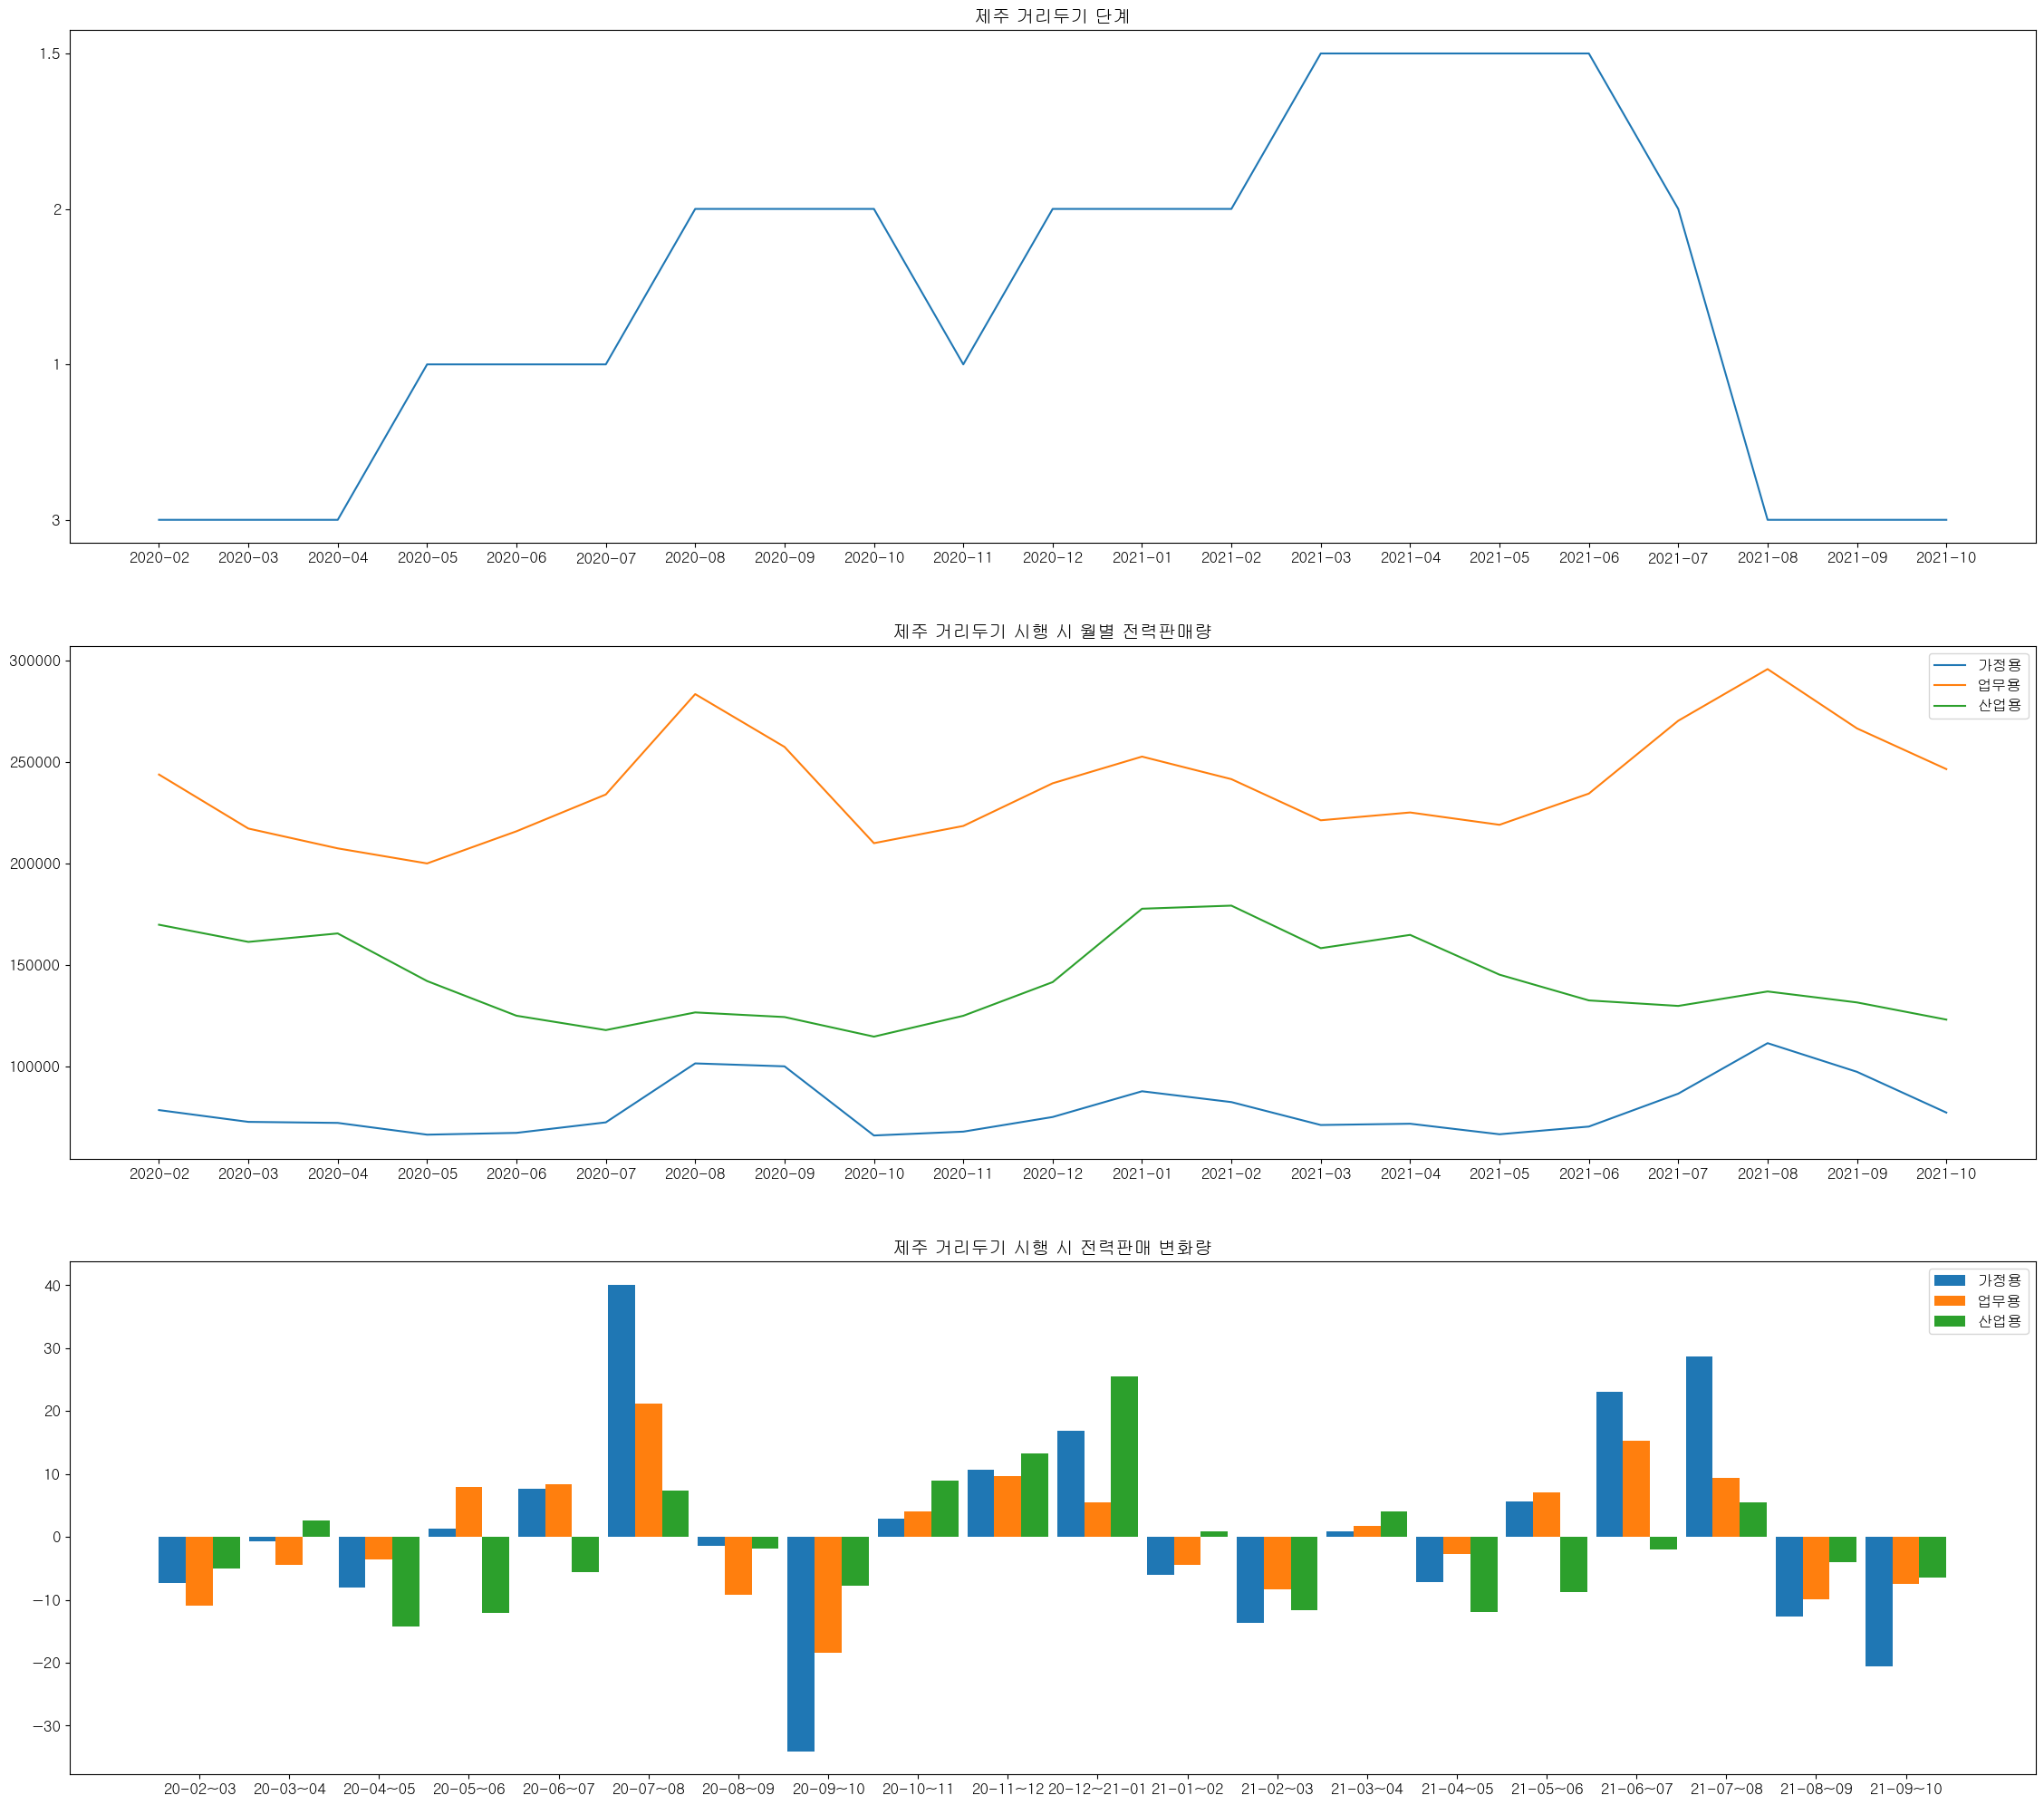

In [47]:
fig, ax = plt.subplots(3,1,figsize=(28,25))
ax[0].plot(월가정제주.iloc[:21].index,거리두기['제주'])
ax[0].set_title('제주 거리두기 단계')
ax[1].plot(월가정제주.iloc[:21],label = '가정용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].plot(월업무제주.iloc[:21],label = '업무용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].plot(월산업제주.iloc[:21],label = '산업용')
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].set_title('제주 거리두기 시행 시 월별 전력판매량')
ax[1].legend()
ax[2].bar(제주가정변화량.index-0.3,제주가정변화량.변화량,width=0.3,label='가정용')
ax[2].bar(제주업무변화량.index,제주업무변화량.변화량,width=0.3,label='업무용')
ax[2].bar(제주산업변화량.index+0.3,제주산업변화량.변화량,width=0.3,label='산업용')
ax[2].set_title('제주 거리두기 시행 시 전력판매 변화량')
ax[2].legend()
fig.show()

In [48]:
시간대별 = pd.read_csv("한국전력거래소_시간대별 평균 전력거래량_20211231.csv",encoding = 'euc-kr')

시간2016 = 시간대별.loc[시간대별.연도 == 2016]
시간2017 = 시간대별.loc[시간대별.연도 == 2017]
시간2018 = 시간대별.loc[시간대별.연도 == 2018]
시간2019 = 시간대별.loc[시간대별.연도 == 2019]
시간2020 = 시간대별.loc[시간대별.연도 == 2020]
시간2021 = 시간대별.loc[시간대별.연도 == 2021]

In [49]:
변화량 = [ ]
try:
    for i in range(시간2016.shape[0]):
        변화량.append(round(((시간2016.iloc[i+1,2] - 시간2016.iloc[i,2]) / 시간2016.iloc[i,2] * 100),2))
except:
    pass
시간2016변화량 = pd.DataFrame(변화량)
시간2016변화량
시간2016변화량.index=(['01-02','02-03','03-04','04-05','05-06','06-07','07-08','08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-00'])
시간2016변화량.columns=(['변화량'])

변화량 = [ ]
try:
    for i in range(시간2017.shape[0]):
        변화량.append(round(((시간2017.iloc[i+1,2] - 시간2017.iloc[i,2]) / 시간2017.iloc[i,2] * 100),2))
except:
    pass
시간2017변화량 = pd.DataFrame(변화량)
시간2017변화량
시간2017변화량.index=(['01-02','02-03','03-04','04-05','05-06','06-07','07-08','08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-00'])
시간2017변화량.columns=(['변화량'])

변화량 = [ ]
try:
    for i in range(시간2018.shape[0]):
        변화량.append(round(((시간2018.iloc[i+1,2] - 시간2018.iloc[i,2]) / 시간2018.iloc[i,2] * 100),2))
except:
    pass
시간2018변화량 = pd.DataFrame(변화량)
시간2018변화량
시간2018변화량.index=(['01-02','02-03','03-04','04-05','05-06','06-07','07-08','08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-00'])
시간2018변화량.columns=(['변화량'])

변화량 = [ ]
try:
    for i in range(시간2019.shape[0]):
        변화량.append(round(((시간2019.iloc[i+1,2] - 시간2019.iloc[i,2]) / 시간2019.iloc[i,2] * 100),2))
except:
    pass
시간2019변화량 = pd.DataFrame(변화량)
시간2019변화량
시간2019변화량.index=(['01-02','02-03','03-04','04-05','05-06','06-07','07-08','08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-00'])
시간2019변화량.columns=(['변화량'])

변화량 = [ ]
try:
    for i in range(시간2020.shape[0]):
        변화량.append(round(((시간2020.iloc[i+1,2] - 시간2020.iloc[i,2]) / 시간2020.iloc[i,2] * 100),2))
except:
    pass
시간2020변화량 = pd.DataFrame(변화량)
시간2020변화량
시간2020변화량.index=(['01-02','02-03','03-04','04-05','05-06','06-07','07-08','08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-00'])
시간2020변화량.columns=(['변화량'])

변화량 = [ ]
try:
    for i in range(시간2021.shape[0]):
        변화량.append(round(((시간2021.iloc[i+1,2] - 시간2021.iloc[i,2]) / 시간2021.iloc[i,2] * 100),2))
except:
    pass
시간2021변화량 = pd.DataFrame(변화량)
시간2021변화량
시간2021변화량.index=(['01-02','02-03','03-04','04-05','05-06','06-07','07-08','08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-00'])
시간2021변화량.columns=(['변화량'])

시간2016변화량.reset_index(inplace=True)
시간2017변화량.reset_index(inplace=True)
시간2018변화량.reset_index(inplace=True)
시간2019변화량.reset_index(inplace=True)
시간2020변화량.reset_index(inplace=True)
시간2021변화량.reset_index(inplace=True)

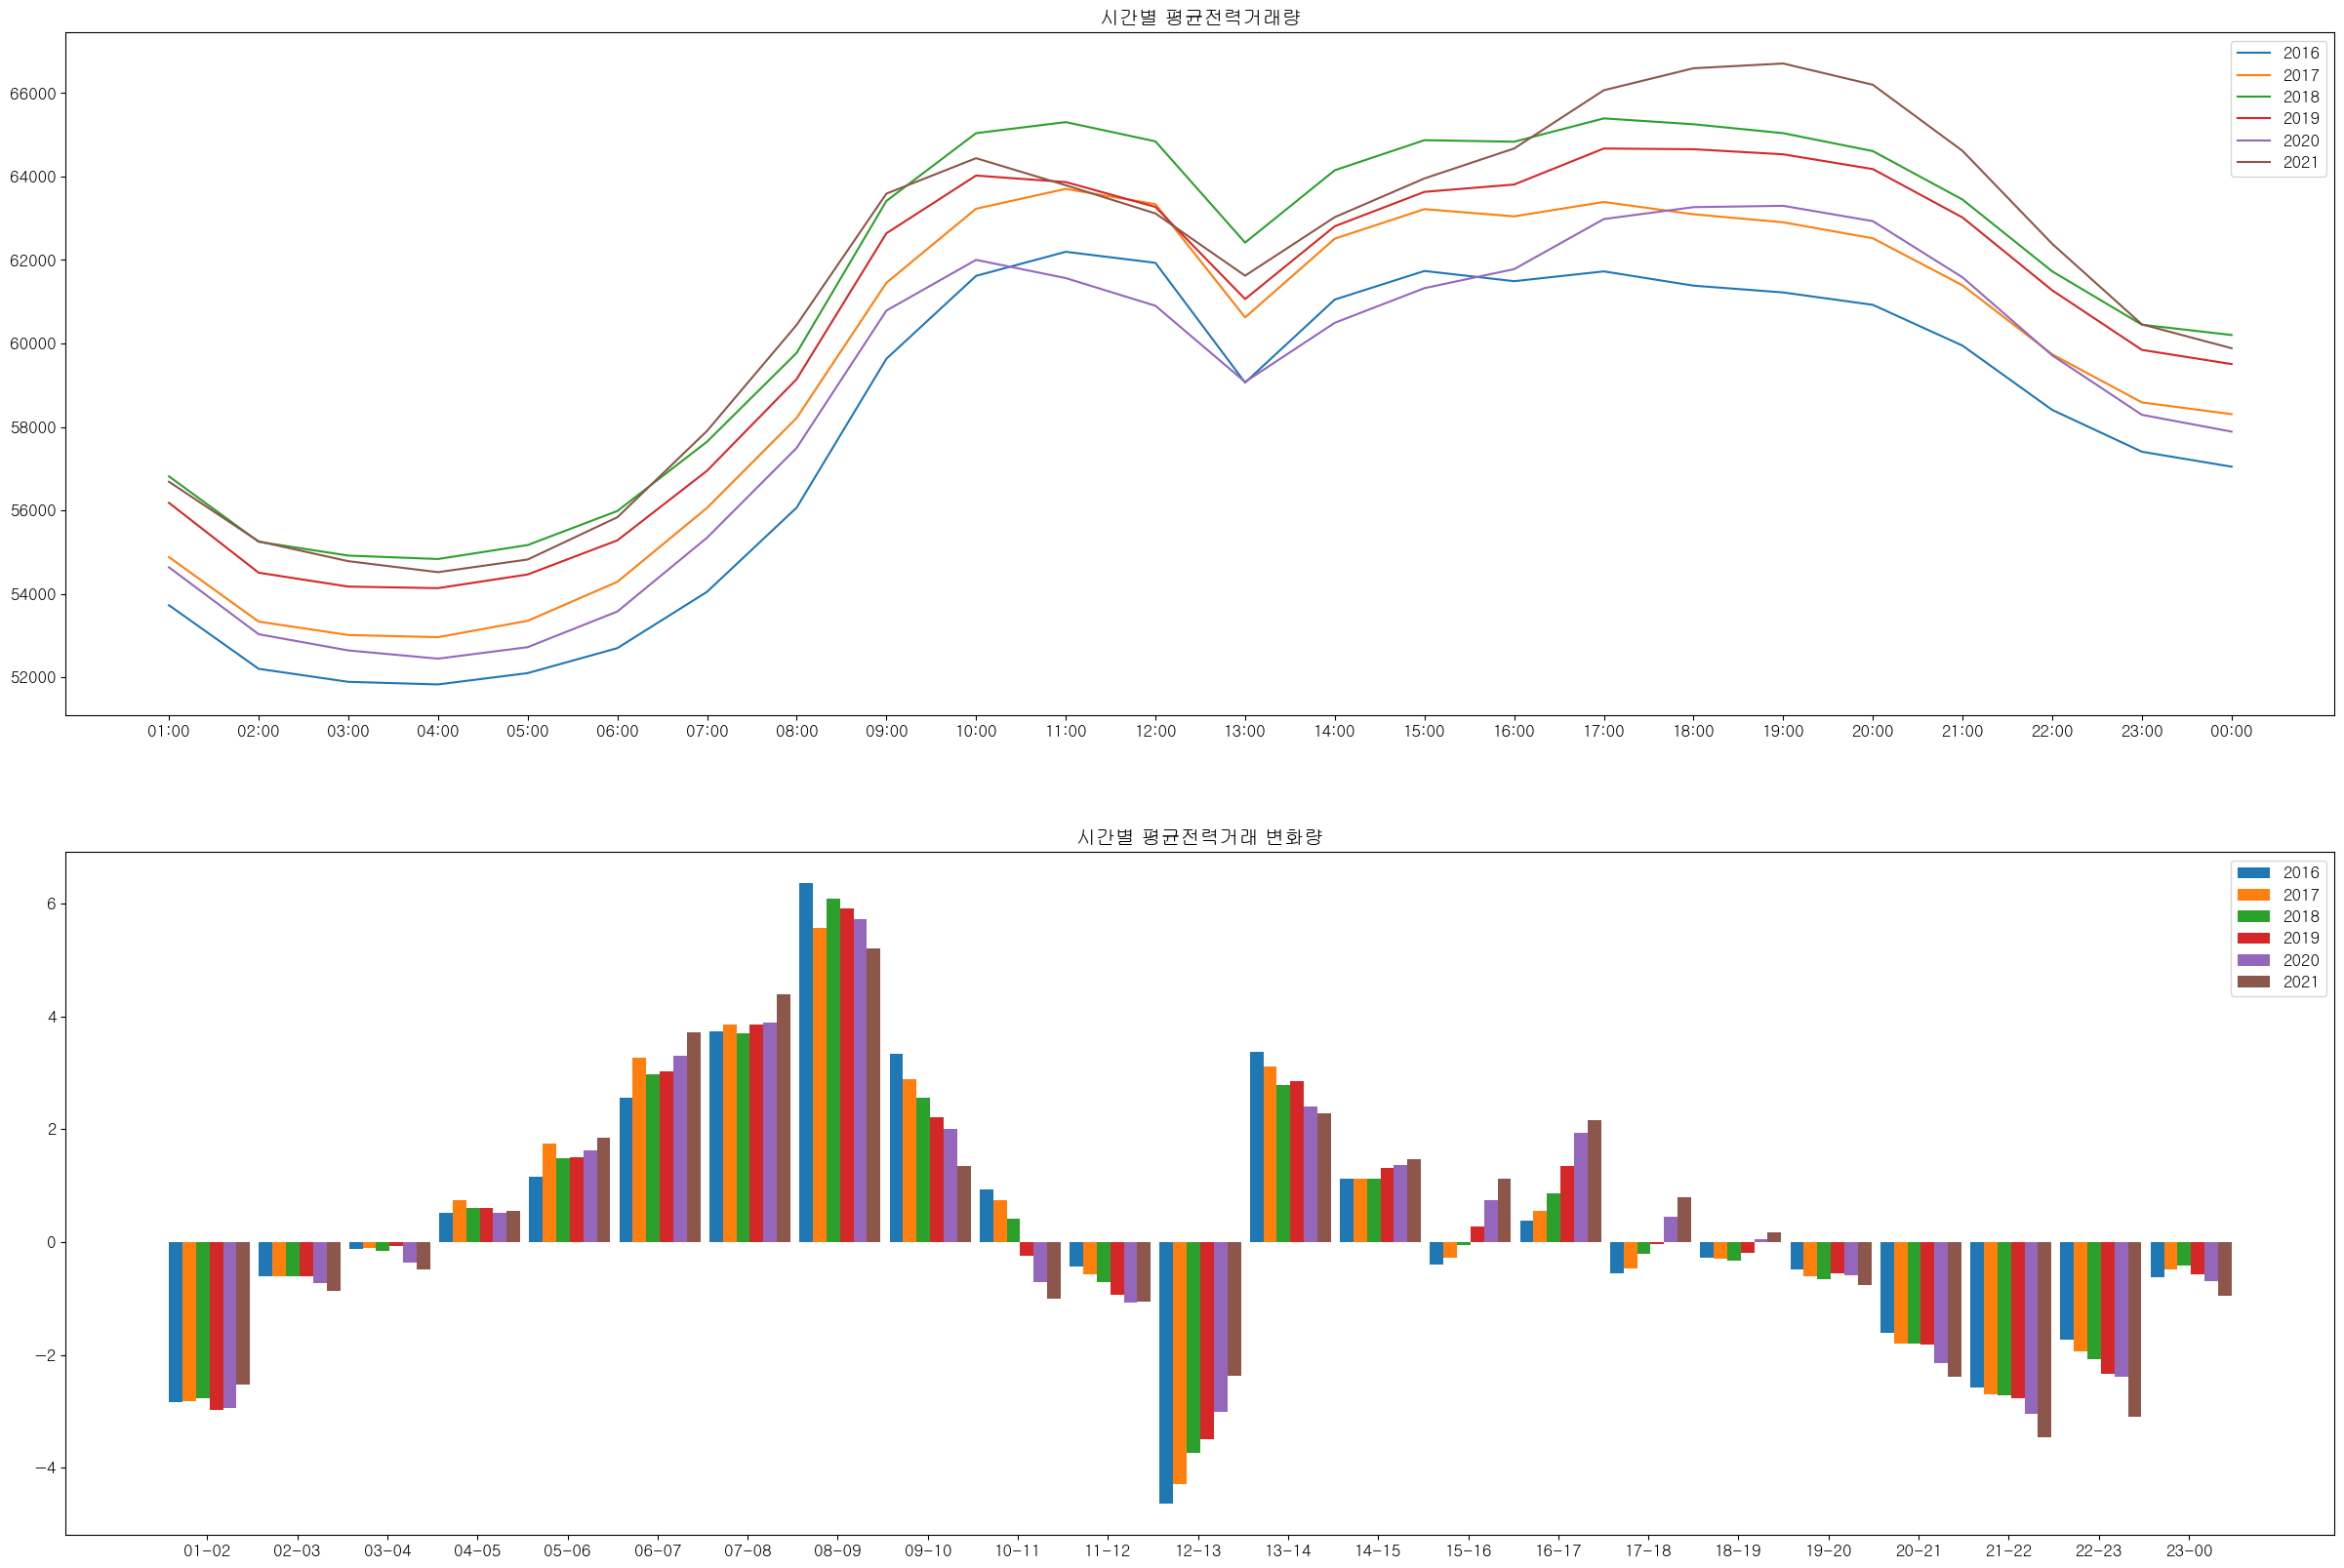

In [50]:
fig, ax = plt.subplots(2,1,figsize=(30,20))
ax[0].plot(시간2016.시간,시간2016.평균전력거래량,label = '2016')
ax[0].plot(시간2017.시간,시간2017.평균전력거래량,label = '2017')
ax[0].plot(시간2018.시간,시간2018.평균전력거래량,label = '2018')
ax[0].plot(시간2019.시간,시간2019.평균전력거래량,label = '2019')
ax[0].plot(시간2020.시간,시간2020.평균전력거래량,label = '2020')
ax[0].plot(시간2021.시간,시간2021.평균전력거래량,label = '2021')
ax[0].legend()
ax[0].set_title('시간별 평균전력거래량')
ax[1].bar(시간2016변화량.index-0.3,시간2016변화량.변화량,width = 0.15,label = '2016')
ax[1].bar(시간2017변화량.index-0.15,시간2017변화량.변화량,width = 0.15,label = '2017')
ax[1].bar(시간2018변화량.index,시간2018변화량.변화량,width = 0.15,label = '2018')
ax[1].bar(시간2019변화량.index+0.15,시간2019변화량.변화량,width = 0.15,label = '2019')
ax[1].bar(시간2020변화량.index+0.3,시간2020변화량.변화량,width = 0.15,label = '2020')
ax[1].bar(시간2021변화량.index+0.45,시간2021변화량.변화량,width = 0.15,label = '2021')
ax[1].set_xticks(np.arange(0.05,시간2016변화량.shape[0],1),시간2016변화량['index'])
ax[1].set_title('시간별 평균전력거래 변화량')
ax[1].legend()